In [45]:
import os
import inspect
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import scanpy as sc
from tqdm import tqdm
import sys
import pickle
import IPython
import pandas as pd
import scipy
import numpy as np
sc.settings.figdir=os.path.expanduser('/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/analysis/de_mts/composition_ratios')
sc._settings.settings._vector_friendly=True
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=300, frameon=False,vector_friendly=True)
plt.rc("axes.spines", top=False, right=False)
import sccoda

sys.path.append('/home/matthew.schmitz/utils/mts-utils/')
from genomics import sc_analysis


gs1=matplotlib.colors.ListedColormap(sc.pl.palettes.godsnot_102,name='godsnot_102')
try:
    matplotlib.colormaps.register(name='godsnot_102',cmap=gs1)
except:
    pass
    
import h5py
import anndata

mamba install -c conda-forge rpy2
pip install sccoda
pip install tf_keras

In [51]:
batch_key='load_id'
species_key='organism'
donor_key='donor_id'
layer_key='UMIs'
leaf_key = 'Group'
MDE_KEY = "X_umap_species_integrated"



In [52]:
with h5py.File('/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/xspecies/Consensus_HMBA_basalganglia_AIT_pre-print.h5ad', "r") as f:
    obs=anndata.io.read_elem(f['obs'])

for col in obs.select_dtypes(['category']).columns:
    obs[col] = obs[col].astype(obs[col].cat.categories.dtype)

# Convert object columns to strings
for col in obs.select_dtypes(['object']).columns:
    obs[col] = obs[col].astype('string')
    
with h5py.File('/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/xspecies/Consensus_HMBA_basalganglia_AIT_pre-print.h5ad', "r") as f:
    uns=anndata.io.read_elem(f['uns'])

obs = obs.drop(obs.columns[obs.columns.str.contains('_score')],axis=1)


In [53]:
obs

,Neighborhood,Class,Subclass,Group,Cluster,cluster_id,cell_type_ontology_term,load_id,donor_id,assay,...,ATAC_library_prep_set,ATAC_library_name,ATAC_tapestation_avg_size_bp,ATAC_library_num_cycles,ATAC_lib_quantification_ng,ATAC_library_pool_name,RNA_r1_index,RNA_r2_index,ATAC_index,alignment_job_id
AAACAGCCAAATGCCC-2362_A05,Nonneuron,Vascular,VLMC,VLMC,Human-451,Human-451,CL:0000003,2362_A05,H24.30.001,10x multiome,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
AAACAGCCAATTGAGA-2362_A05,Nonneuron,OPC-Oligo,Oligodendrocyte,Oligo OPALIN,Human-1,Human-1,CL:0000003,2362_A05,H24.30.001,10x multiome,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
AAACAGCCAGCATGTC-2362_A05,Nonneuron,Immune,Microglia,Microglia,Human-153,Human-153,CL:0000003,2362_A05,H24.30.001,10x multiome,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
AAACAGCCATTGACAT-2362_A05,Nonneuron,OPC-Oligo,Oligodendrocyte,Oligo OPALIN,Human-1,Human-1,CL:0000003,2362_A05,H24.30.001,10x multiome,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
AAACAGCCATTGTGGC-2362_A05,Nonneuron,Astro-Epen,Astrocyte,Astrocyte,Human-14,Human-14,CL:0000003,2362_A05,H24.30.001,10x multiome,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCAAACTTCATGTGGT-P0074_3,Nonneuron,Immune,Microglia,Microglia,Marmoset-712,Marmoset-712,CL:0000003,P0074_3,cjRambo,10x multiome,...,LPLCXA_241104_1,LPLCXA_241104_1_G11,450.0,8.0,1352.0,BR_PXA_241204_2,SI-TT-E05_i7,SI-TT-E05_b(i5),SI-NA-G11,250114.0
GACCTGATCATAACTG-P0074_3,Nonneuron,Immune,Microglia,Microglia,Marmoset-715,Marmoset-715,CL:0000003,P0074_3,cjRambo,10x multiome,...,LPLCXA_241104_1,LPLCXA_241104_1_G11,450.0,8.0,1352.0,BR_PXA_241204_2,SI-TT-E05_i7,SI-TT-E05_b(i5),SI-NA-G11,250114.0
GAACTTATCCTAAATG-P0074_3,Nonneuron,OPC-Oligo,Oligodendrocyte,Oligo OPALIN,Marmoset-2,Marmoset-2,CL:0000003,P0074_3,cjRambo,10x multiome,...,LPLCXA_241104_1,LPLCXA_241104_1_G11,450.0,8.0,1352.0,BR_PXA_241204_2,SI-TT-E05_i7,SI-TT-E05_b(i5),SI-NA-G11,250114.0
CTTATTGGTCTTTGAC-P0074_3,Nonneuron,Immune,Microglia,Microglia,Marmoset-715,Marmoset-715,CL:0000003,P0074_3,cjRambo,10x multiome,...,LPLCXA_241104_1,LPLCXA_241104_1_G11,450.0,8.0,1352.0,BR_PXA_241204_2,SI-TT-E05_i7,SI-TT-E05_b(i5),SI-NA-G11,250114.0


In [5]:
# with h5py.File('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/SpinalCord/external_realigned/analysis/integration/multispecies_integrated_realigned_qcfiltered_SpC.h5ad', "r") as f:
#     obs=anndata.io.read_elem(f['obs'])

# for col in obs.select_dtypes(['category']).columns:
#     obs[col] = obs[col].astype(obs[col].cat.categories.dtype)

# # Convert object columns to strings
# for col in obs.select_dtypes(['object']).columns:
#     obs[col] = obs[col].astype('string')
    
# with h5py.File('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/SpinalCord/manuscript/RNA/AIBS_SpC_consensus_taxonomy_harmonized_AIT-pre-print.h5ad', "r") as f:
#     uns=anndata.io.read_elem(f['uns'])

# obs = obs.drop(obs.columns[obs.columns.str.contains('_score')],axis=1)


# obs['spinalcord_segment'] = obs['roi']
# obs['Group'] = obs['Group_propagated']
# obs['Subclass'] = obs['Subclass_propagated']
# obs['Class'] = obs['Class_propagated']
# obs['organism_name'] = obs['species']
# obs['spinalcord_segment'] = obs['spinalcord_segment'].replace({'':'unknown'})
# obs[batch_key] = obs['batch']
# obs = obs.loc[~obs['study'].isin(['Blum:Mouse','Alkaslasi:Mouse','AIBS_BCL6:Macaque'])]

In [54]:
obs[species_key] = obs[species_key].astype('category')
obs[leaf_key] = obs[leaf_key].astype('category')
obs[species_key] = obs[species_key].cat.reorder_categories(['Human','Macaque','Marmoset'])#,'Mouse'
uns[f'{species_key}_color_dict'] = {"Human":"#377eb8", "Macaque":"#4daf4a", "Marmoset":"darkorchid", "Mouse":"darkorange"}
uns[f'{species_key}_colors'] = [uns[f'{species_key}_color_dict'][x] for x in obs[species_key].cat.categories]

In [55]:
obs[['anatomical_region',
 'anatomical_region_merged',
 'anatomical_region_ontology_term_id',
 'brain_region_ontology_term_id']]

,anatomical_region,anatomical_region_merged,anatomical_region_ontology_term_id,brain_region_ontology_term_id
AAACAGCCAAATGCCC-2362_A05,GPe,GPe,Unknown,Unknown
AAACAGCCAATTGAGA-2362_A05,GPe,GPe,Unknown,Unknown
AAACAGCCAGCATGTC-2362_A05,GPe,GPe,Unknown,Unknown
AAACAGCCATTGACAT-2362_A05,GPe,GPe,Unknown,Unknown
AAACAGCCATTGTGGC-2362_A05,GPe,GPe,Unknown,Unknown
...,...,...,...,...
GCAAACTTCATGTGGT-P0074_3,Brain,Brain,unknown,unknown
GACCTGATCATAACTG-P0074_3,Brain,Brain,unknown,unknown
GAACTTATCCTAAATG-P0074_3,Brain,Brain,unknown,unknown
CTTATTGGTCTTTGAC-P0074_3,Brain,Brain,unknown,unknown


In [56]:
groups = pd.read_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/anno_tables/consensus_annotation_groups.tsv',header=None)[0]
obs['Group'] = obs['Group'].cat.reorder_categories(groups)

In [57]:
list(obs.loc[obs['Class'].isin(['CN LGE GABA'])]['Group'].unique())

['STRv D1 MSN',
 'STRd D2 Matrix MSN',
 'STRd D1 Matrix MSN',
 'STRd D2 Striosome MSN',
 'STRv D2 MSN',
 'STR D1D2 Hybrid MSN',
 'STRv D1 NUDAP MSN',
 'STRd D1 Striosome MSN',
 'STRd D2 StrioMat Hybrid MSN',
 'GPe MEIS2-SOX6 GABA',
 'OT D1 ICj']

In [58]:
obs = obs.loc[obs['Class'].isin(['CN LGE GABA'])]
obs = obs.loc[~obs['Group'].str.contains('GPe')]

In [59]:
obs[leaf_key] = obs[leaf_key].cat.remove_unused_categories()

In [60]:
obs['anatomical_region'].unique()
obs['anatomical_region'].isin(['CaH', 'Ca','CaB','CaT', 'Pu','PuR','PuC','PuPV','NAC','NACc','NACs'])

AAACCAACAAGGTACG-2362_A05    False
AAACCAACATGAAGTA-2362_A05    False
AAACCGAAGTAGAGGC-2362_A05    False
AAACCGCGTACGTTTC-2362_A05    False
AAACCGCGTGATTTGG-2362_A05    False
                             ...  
TTCCTTCTCTCACTAT-P0074_3     False
AGCTGCTCAGTCTAGC-P0074_3     False
GTGTGTTAGAACAAGT-P0074_3     False
GCTAGTGTCACAGCCA-P0074_3     False
GGACTAAAGGATTGAG-P0074_3     False
Name: anatomical_region, Length: 848201, dtype: bool

In [61]:
# for r in ['CaH','CaB','CaT', 'Pu','PuR','PuC','PuPV','NAC']:
#     comp_df=obs.loc[obs['anatomical_region']==r].groupby(species_key)[leaf_key].value_counts(normalize=True).unstack()
#     comp_df[species_key]=comp_df.index
#     comp_df.columns = list(comp_df.columns.astype(str))
#     comp_df = comp_df.drop('organism',axis=1)
#     comp_df.loc[:,comp_df.sum(0)>0.01]
#     comp_df[species_key] = comp_df.index 
#     # Melt the DataFrame
#     df_melted = pd.melt(comp_df, id_vars=species_key, var_name='Cell_Type', value_name='Value')
    
#     # Create the barplot
#     plt.figure(figsize=(15, 10))
#     seaborn.barplot(data=df_melted, x='Cell_Type', y='Value', hue=species_key)
#     plt.xticks(rotation=90)  # Rotate the x labels for better readability
#     plt.title(f'Distribution of Groups Across Species in {r}')
#     plt.ylabel('Proportion')
#     plt.xlabel('Group')
#     plt.legend(title=species_key)
#     plt.show()


In [62]:
pal = {'Human':'blue','Macaque':'green','Marmoset':'purple','Mouse':'orange'}

/scratch/fast/4133715/ipykernel_1683859/3791376208.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(obs[species_key]):
/scratch/fast/4133715/ipykernel_1683859/3791376208.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub.groupby(['load_id', species_key, leaf_key])
/scratch/fast/4133715/ipykernel_1683859/3791376208.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  keep = prop.groupby('Cell_Type')['Value'].sum() > 0.01
/scratch/fast/4133715/ipykernel_1683859/379

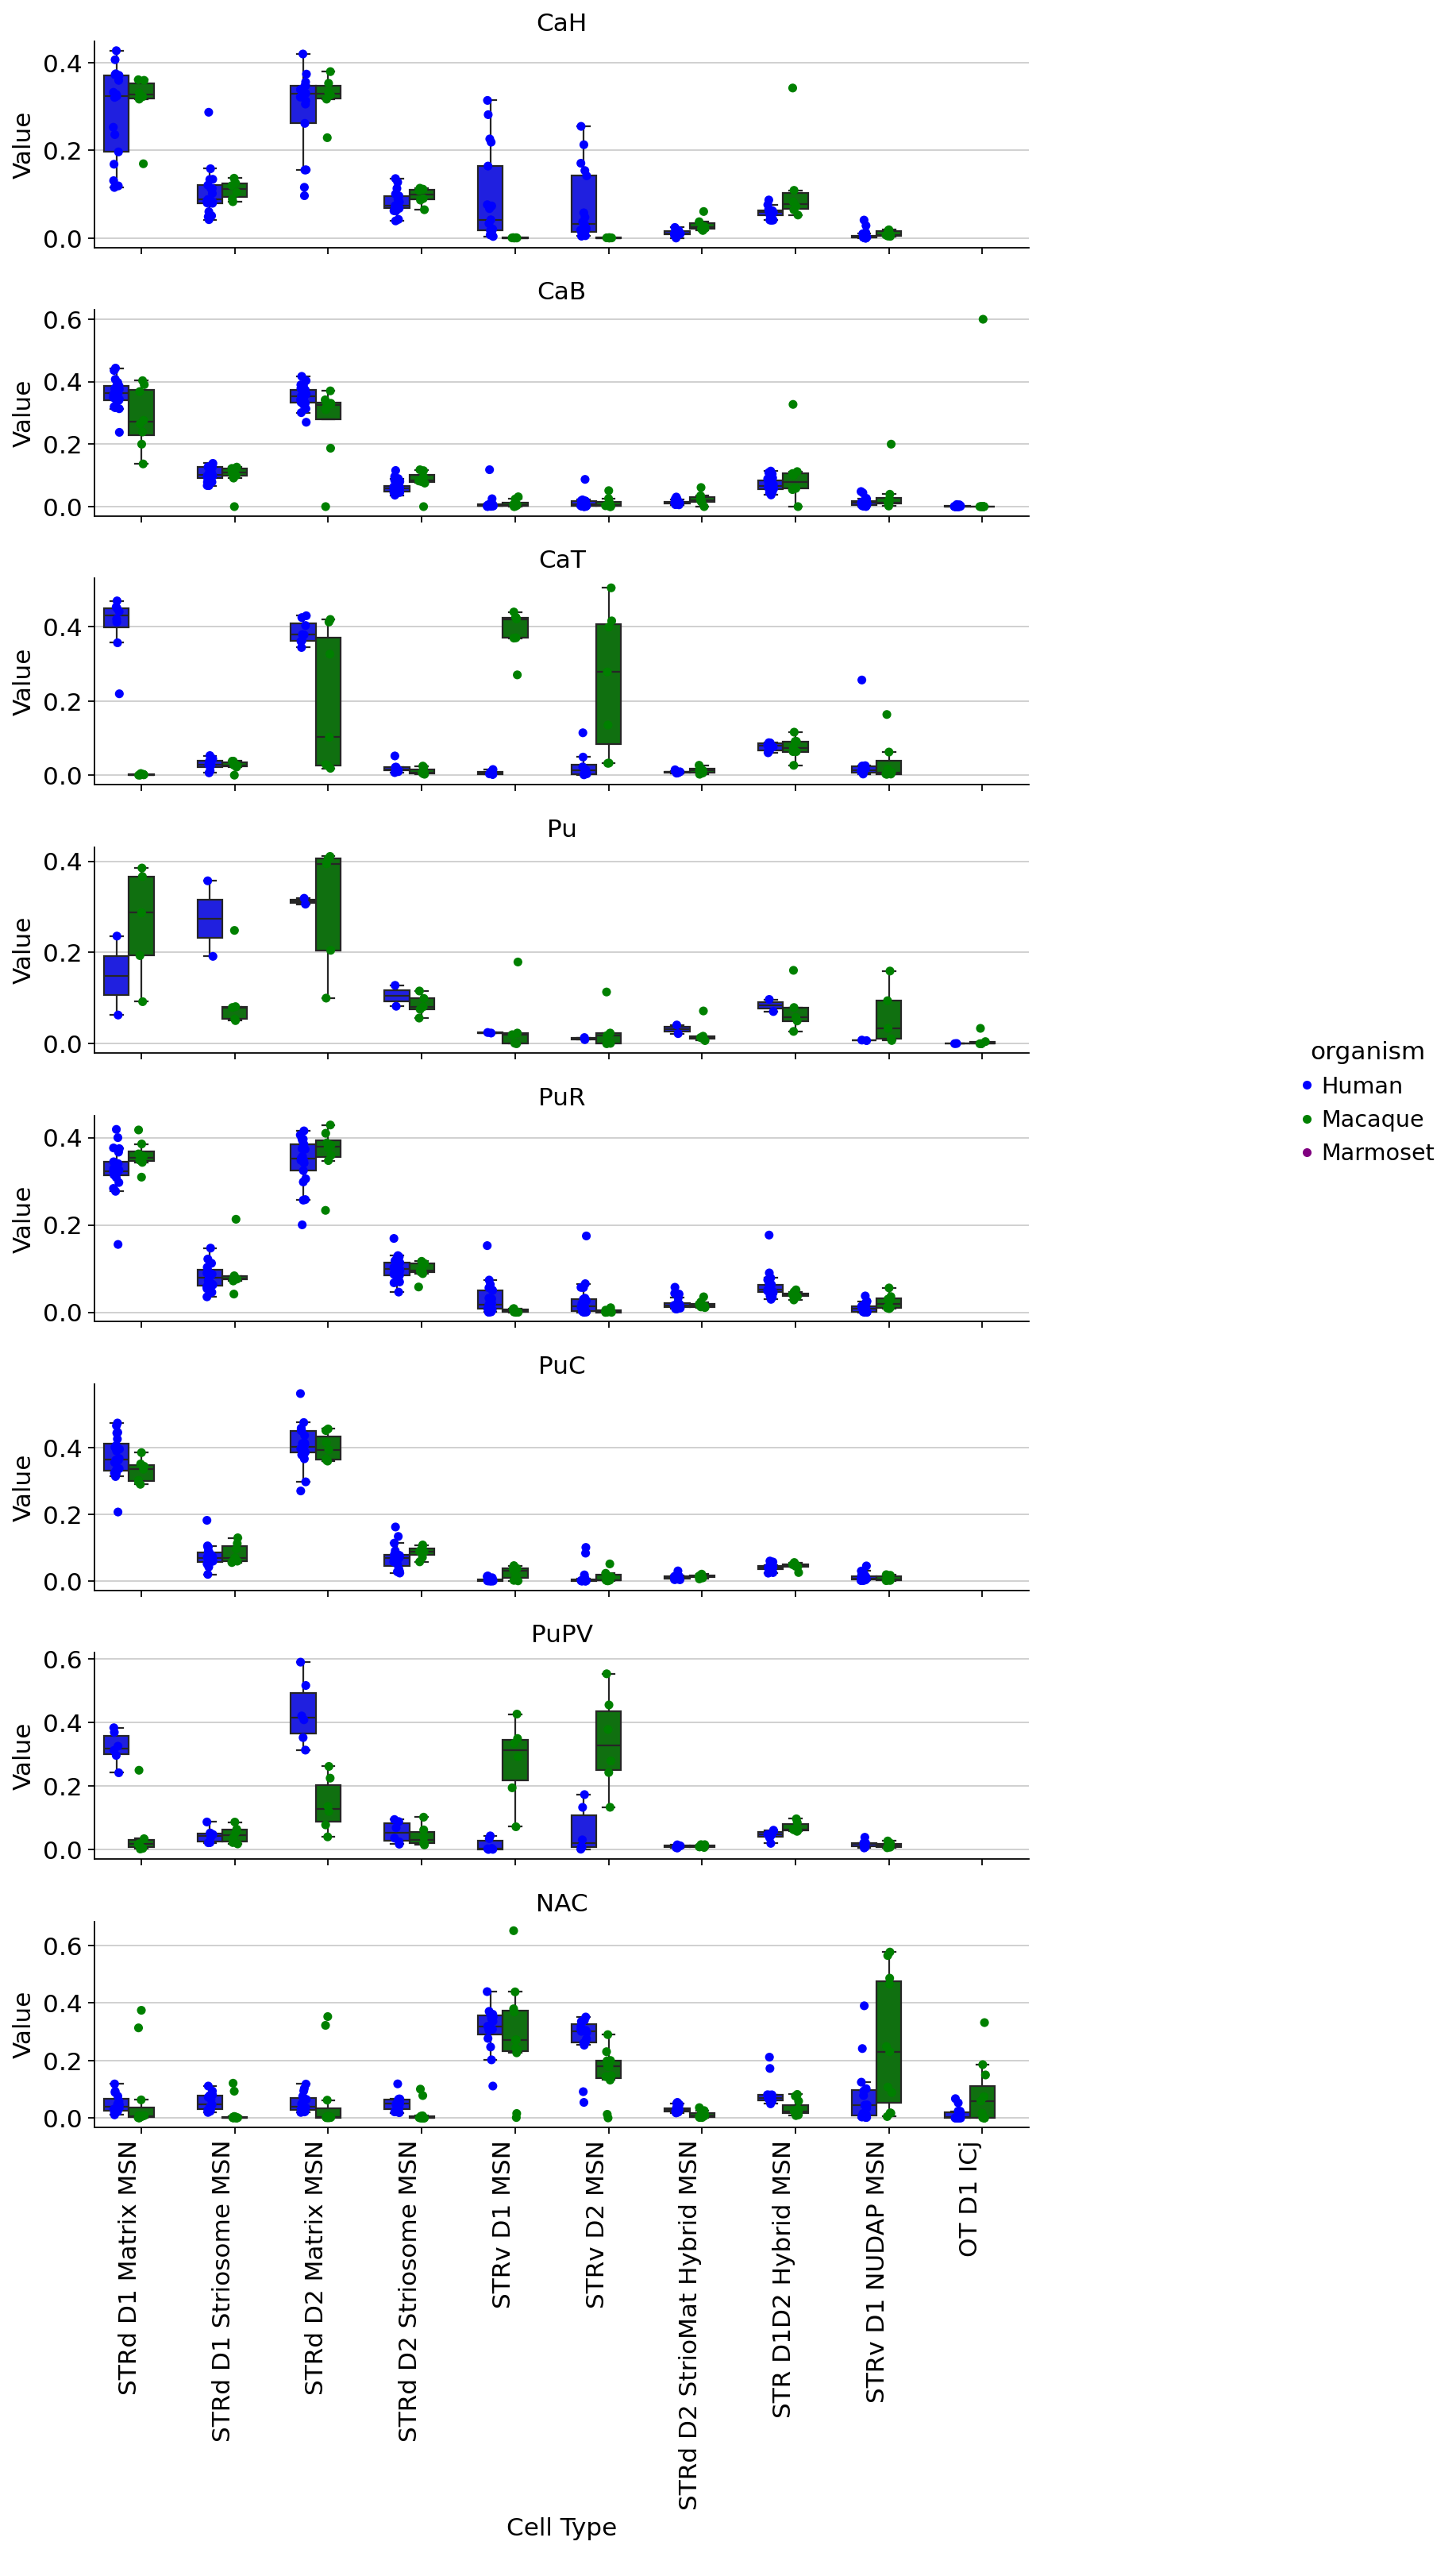

In [68]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

regions = ['CaH','CaB','CaT','Pu','PuR','PuC','PuPV','NAC']

if pd.api.types.is_categorical_dtype(obs[species_key]):
    species_levels = obs[species_key].cat.categories.to_list()
else:
    species_levels = sorted(obs[species_key].unique())

dfs = []
for r in regions:
    sub = obs.loc[obs['anatomical_region'] == r, ['load_id', species_key, leaf_key]]
    if sub.empty:
        continue
    tab = (
        sub.groupby(['load_id', species_key, leaf_key])
           .size()
           .unstack(fill_value=0)
    )
    prop = tab.div(tab.sum(axis=1), axis=0)
    prop = prop.stack().rename('Value').reset_index().rename(columns={leaf_key: 'Cell_Type'})
    keep = prop.groupby('Cell_Type')['Value'].sum() > 0.01
    prop = prop[prop['Cell_Type'].isin(keep[keep].index)]
    prop['anatomical_region'] = r
    dfs.append(prop)

facet_df = pd.concat(dfs, ignore_index=True)

g = seaborn.FacetGrid(
    facet_df,
    col='anatomical_region',
    col_wrap=1,
    sharex=True,
    sharey=False,
    height=2.2,
    aspect=4
)

g.map_dataframe(
    seaborn.boxplot,
    x='Cell_Type',
    y='Value',
    hue=species_key,
    palette=pal,
    hue_order=species_levels,
    dodge=True,
    showfliers=False
)
g.map_dataframe(
    seaborn.stripplot,
    x='Cell_Type',
    y='Value',
    hue=species_key,
    palette=pal,
    hue_order=species_levels,
    dodge=True,
)

# hide x on all but bottom; rotate later
for ax in g.axes.flat[:-1]:
    ax.tick_params(labelbottom=False)

bottom_ax = g.axes.flat[-1]
bottom_ax.set_xlabel('Cell Type')

# g.set_axis_labels('', 'Proportion per load_id')
g.set_titles('{col_name}')

# legend at center-right
g.add_legend(title=species_key, loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.draw()  # ensure ticks exist before modifying

# force bottom ticklabels visible + rotated
bottom_ax.tick_params(axis='x', labelbottom=True)
labels = [t.get_text() for t in bottom_ax.get_xticklabels()]
bottom_ax.set_xticklabels(labels, rotation=90, ha='right')
plt.savefig(os.path.join(sc.settings.figdir, 'MSN_composition_striatum_boxplots.pdf'), format='pdf',bbox_inches='tight')
plt.show()


/scratch/fast/4133715/ipykernel_1683859/285609679.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby([species_key, batch_key])['Subclass'].value_counts(normalize=True).reset_index(name='proportion')
/scratch/fast/4133715/ipykernel_1683859/285609679.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


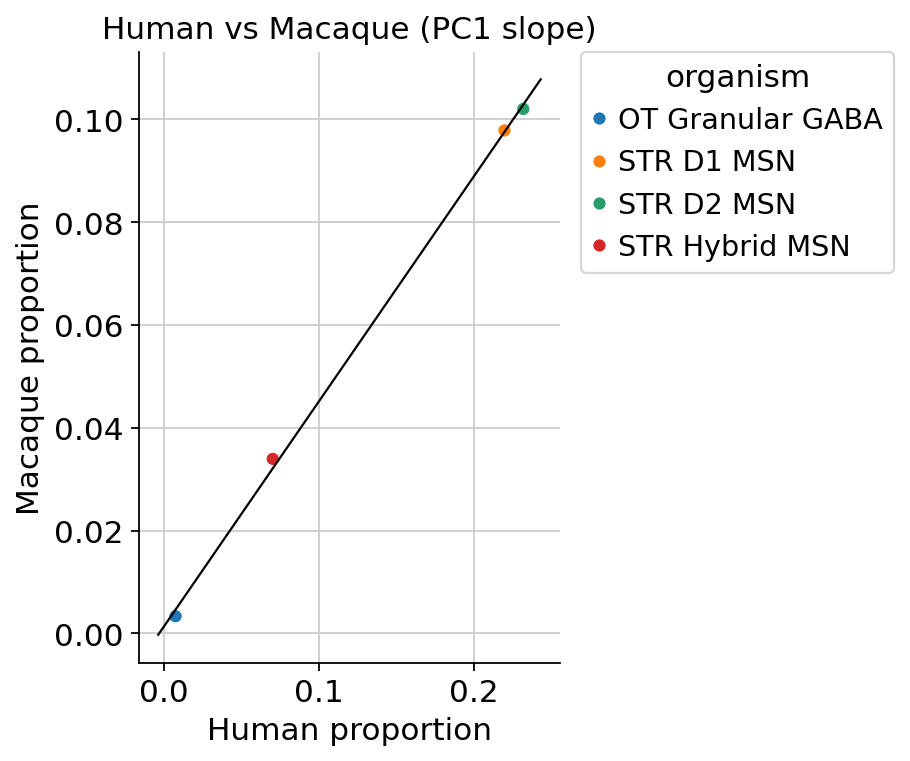

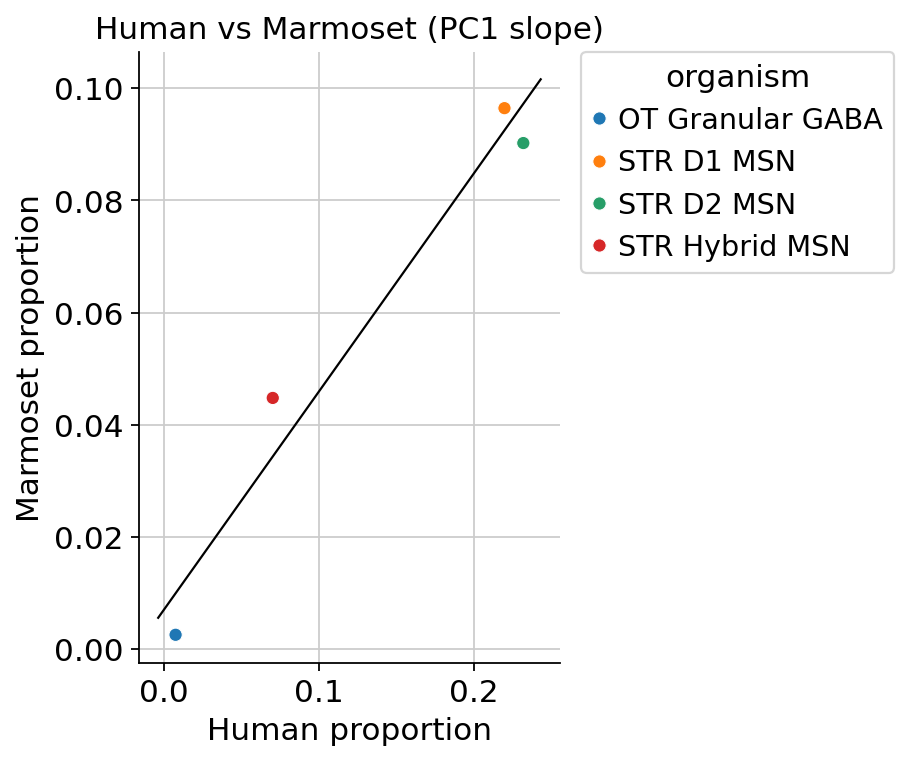

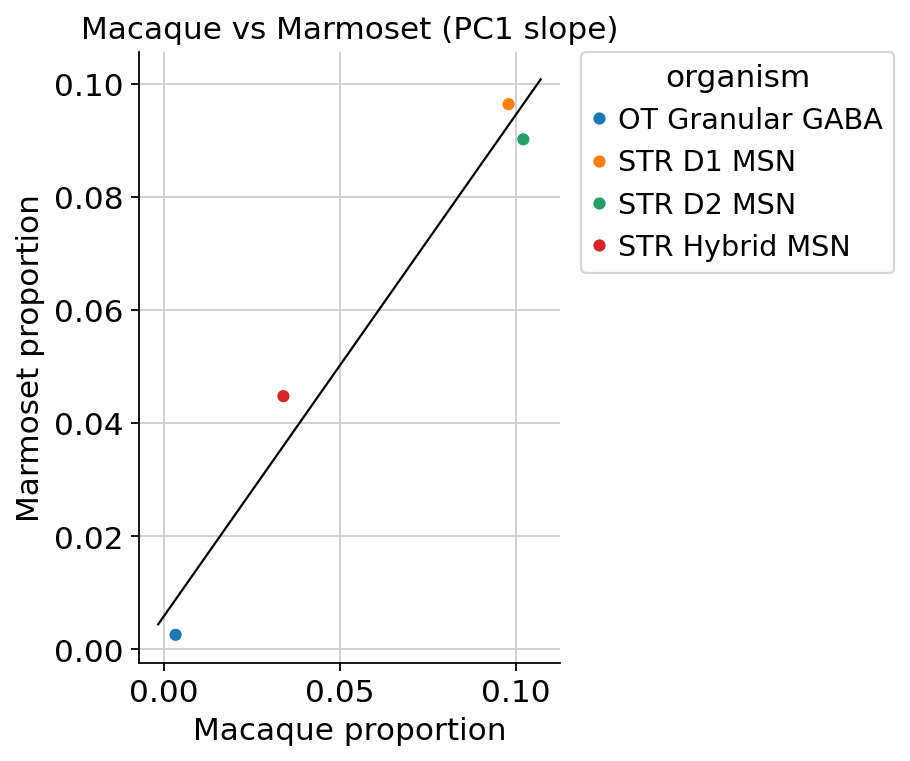

In [65]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = obs.loc[~obs['Neighborhood'].isin(['Nonneuron']), :]
vcs = filtered_df[batch_key].value_counts()
filtered_df = filtered_df.loc[filtered_df[batch_key].isin(vcs.index[vcs>100]),:]
grouped_df = filtered_df.groupby([species_key, batch_key])['Subclass'].value_counts(normalize=True).reset_index(name='proportion')
grouped_df.index = grouped_df[batch_key]


# 1) pivot to Subclass × Species
df_wide = (
    grouped_df
    .pivot_table(
        index='Subclass',
        columns=['organism'],
        values='proportion',
        aggfunc='mean'
    )
    .dropna()    # drop any subclasses missing a species
)

# 2) center
species = df_wide.columns.tolist()
means = df_wide.mean(axis=0)
M = df_wide - means

# 3) SVD
U, S, Vt = np.linalg.svd(M.values, full_matrices=False)

# 4) first principal direction
pc1 = Vt[0]  # shape (n_species,)

# 5) set up for plotting
df_plot = df_wide.reset_index()
pairs = [
    (species[i], species[j])
    for i in range(len(species))
    for j in range(i+1, len(species))
]

for x_spec, y_spec in pairs:
    i, j = species.index(x_spec), species.index(y_spec)
    slope = pc1[j] / pc1[i]
    intercept = means[y_spec] - slope * means[x_spec]

    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=df_plot,
        x=x_spec, y=y_spec,
        hue='Subclass',
        #palette=uns['Subclass_colors_dict'],
        legend=True
    )

    # line over the current x‑range
    xlims = plt.gca().get_xlim()
    xs = np.array(xlims)
    ys = slope * xs + intercept
    plt.plot(xs, ys, color='black', lw=1)

    plt.xlabel(f'{x_spec} proportion')
    plt.ylabel(f'{y_spec} proportion')
    plt.title(f'{x_spec} vs {y_spec} (PC1 slope)')
    plt.legend(title=species_key,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()


In [49]:
obs.loc[:,['load_id','donor_id','Class','Subclass','Group']]
tax_level = 'Subclass'


obs = obs.loc[~obs['Subclass'].isin(['Macrophages','Visceral-MN','Schwann','Macrophages','Skeletal-MN','Vascular','Lymphocytes','Endo'])]
obs['Group'] = obs['Group'].cat.remove_unused_categories()
obs['Subclass'] = obs['Subclass'].cat.remove_unused_categories()

counts = (obs.groupby(['load_id',tax_level])
            .size()
            .unstack(fill_value=0)
            .sort_index())

# make sure reference column exists
if "GM Astro" not in counts.columns:
    counts["GM Astro"] = 0
counts = counts[counts.columns.sort_values()]

# covariates: one row per load_id
# here, organism_name is the predictor of interest
org_per_load = (obs.groupby("load_id")["organism_name"]
                  .agg(lambda x: x.mode().iat[0] if len(x.mode()) else x.iloc[0]))
cov = pd.DataFrame({"organism_name": org_per_load}).loc[counts.index]

# ---- scCODA ----
import sccoda
from sccoda.util import cell_composition_data as dat
from sccoda.util.comp_ana import CompositionalAnalysis

# AnnData-like structure with counts and covariates
adata = dat.from_pandas(
    pd.concat([cov, counts], axis=1),
    covariate_columns=["organism_name"]
)

# model formula: organism_name
model = CompositionalAnalysis(
    adata,
    formula="organism_name",
    reference_cell_type="GM Astro"
)

# run HMC sampling
res = model.sample_hmc()

# inspect results
summary = res.summary()
credible = res.credible_effects()


/scratch/fast/3628313/ipykernel_419147/1999743310.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (obs.groupby(['load_id',tax_level])


Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [02:35<00:00, 128.47it/s]


MCMC sampling finished. (196.353 sec)
Acceptance rate: 46.0%
Compositional Analysis summary:

Data: 35 samples, 14 cell types
Reference index: 7
Formula: organism_name

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
Astro                2.157      1362.334202
CSF-cNs             -1.271        44.210169
Chol-IN             -1.050        55.144380
Ependymal           -0.519        93.780302
GABA-D               0.245       201.331909
GABA-M              -0.477        97.802959
GABA-V              -0.403       105.314892
GM Astro            -1.744        27.548686
Glut-D               0.551       273.405170
Glut-M              -0.435       101.998166
Glut-V              -0.495        96.058255
Microglia            1.792       945.727841
OPC                  0.034       163.033358
Oligo                2.393      1724.952569


Effects:
                                    Final Parameter  Expected Sample  \
Covariate                Cell Ty

In [57]:
import pandas as pd
import numpy as np

tax_level = 'Subclass'
ref_type = "GM Astro"

obs = obs.loc[~obs['Subclass'].isin(['Macrophages','Visceral-MN','Schwann','Skeletal-MN','Vascular','Lymphocytes','Endo'])]
obs['Group'] = obs['Group'].cat.remove_unused_categories()
obs['Subclass'] = obs['Subclass'].cat.remove_unused_categories()

# counts: sample(load_id) × cell type
counts = (obs.groupby(['load_id', tax_level])
            .size()
            .unstack(fill_value=0)
            .sort_index())

if ref_type not in counts.columns:
    counts[ref_type] = 0
counts = counts[counts.columns.sort_values()]

# covariates (one row per load_id)
org_per_load = (obs.groupby("load_id")["organism_name"]
                  .agg(lambda x: x.mode().iat[0] if len(x.mode()) else x.iloc[0]))
seg_per_load = (obs.groupby("load_id")["spinalcord_segment"]
                  .agg(lambda x: x.mode().iat[0] if len(x.mode()) else x.iloc[0]))

cov = pd.DataFrame({
    "organism_name": org_per_load,
    "spinalcord_segment": seg_per_load
}).loc[counts.index]

# optional: set explicit reference levels
# (edit these if you have preferred baselines)
if not pd.api.types.is_categorical_dtype(cov['organism_name']):
    cov['organism_name'] = cov['organism_name'].astype('category')
if not pd.api.types.is_categorical_dtype(cov['spinalcord_segment']):
    cov['spinalcord_segment'] = cov['spinalcord_segment'].astype('category')

cov['organism_name'] = cov['organism_name'].cat.reorder_categories(
    [cov['organism_name'].mode().iat[0]] + [c for c in cov['organism_name'].cat.categories if c != cov['organism_name'].mode().iat[0]],
    ordered=True
)
cov['spinalcord_segment'] = cov['spinalcord_segment'].cat.reorder_categories(
    [cov['spinalcord_segment'].mode().iat[0]] + [c for c in cov['spinalcord_segment'].cat.categories if c != cov['spinalcord_segment'].mode().iat[0]],
    ordered=True
)

# ---- scCODA ----
import sccoda
from sccoda.util import cell_composition_data as dat
from sccoda.util.comp_ana import CompositionalAnalysis

adata = dat.from_pandas(
    pd.concat([cov, counts], axis=1),
    covariate_columns=["organism_name", "spinalcord_segment"]
)

# Additive model: test organism_name while adjusting for spinalcord_segment
# If you need to force a specific reference in the formula, use:
# formula = "C(organism_name) + C(spinalcord_segment)"
# With the categorical order set above, plain names are fine:
model = CompositionalAnalysis(
    adata,
    formula="organism_name + spinalcord_segment",
    reference_cell_type=ref_type
)

res = model.sample_hmc()
summary = res.summary()
credible = res.credible_effects()


/scratch/fast/3628313/ipykernel_419147/2762665808.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (obs.groupby(['load_id', tax_level])
/scratch/fast/3628313/ipykernel_419147/2762665808.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(cov['organism_name']):
/scratch/fast/3628313/ipykernel_419147/2762665808.py:35: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(cov['spinalcord_segment']):


Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [02:42<00:00, 122.77it/s]


MCMC sampling finished. (206.590 sec)
Acceptance rate: 35.3%
Compositional Analysis summary:

Data: 35 samples, 14 cell types
Reference index: 7
Formula: organism_name + spinalcord_segment

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
Astro                3.723       504.857497
CSF-cNs              0.703        24.637661
Chol-IN              0.307        16.581311
Ependymal            2.702       181.867101
GABA-D               3.735       510.952283
GABA-M               2.657       173.864491
GABA-V               3.366       353.285392
GM Astro            -1.539         2.617648
Glut-D               4.325       921.751999
Glut-M               2.349       127.775677
Glut-V               3.508       407.188493
Microglia            1.685        65.777393
OPC                  2.713       183.878682
Oligo                5.004      1817.607229


Effects:
                                         Final Parameter  Expected Sample  \
Covari

In [73]:
df = res.effect_df['log2-fold change'].unstack().reset_index()
df.index = list(df['Covariate'])
df = df.drop(['Covariate'],axis=1)


Cell Type,Astro,CSF-cNs,Chol-IN,Ependymal,GABA-D,GABA-M,GABA-V,GM Astro,Glut-D,Glut-M,Glut-V,Microglia,OPC,Oligo
organism_name[T.Human],1.475135,0.445805,1.097857,-1.206599,-1.599723,-1.141390,-1.934096,3.886616,-1.867662,-0.656008,-2.369438,3.886616,-0.584930,0.029167
organism_name[T.Macaque],-0.491012,0.506836,1.549583,-1.471949,0.298163,0.171122,-0.121529,3.140383,-0.215118,0.506498,-0.472837,3.955199,-0.138859,-0.652617
spinalcord_segment[T.Lumbar],0.071190,0.071190,0.071190,0.527585,0.071190,0.071190,0.071190,0.071190,0.071190,0.387157,0.071190,0.071190,0.071190,-0.241113
spinalcord_segment[T.Sacral],0.101021,0.761317,0.101021,1.985256,0.101021,0.101021,0.480303,0.101021,0.101021,0.101021,0.101021,0.101021,-0.398636,-0.907475
spinalcord_segment[T.Thoracic],-0.017520,-0.017520,-0.017520,0.377345,-0.017520,-0.017520,-0.017520,-0.017520,-0.017520,-0.017520,-0.017520,-0.017520,0.039479,-0.017520
spinalcord_segment[T.unknown],-1.506010,-1.506010,6.156602,-1.506010,0.653830,-1.506010,-1.506010,-1.506010,-1.506010,-1.506010,2.459977,-1.506010,-1.506010,-3.409338


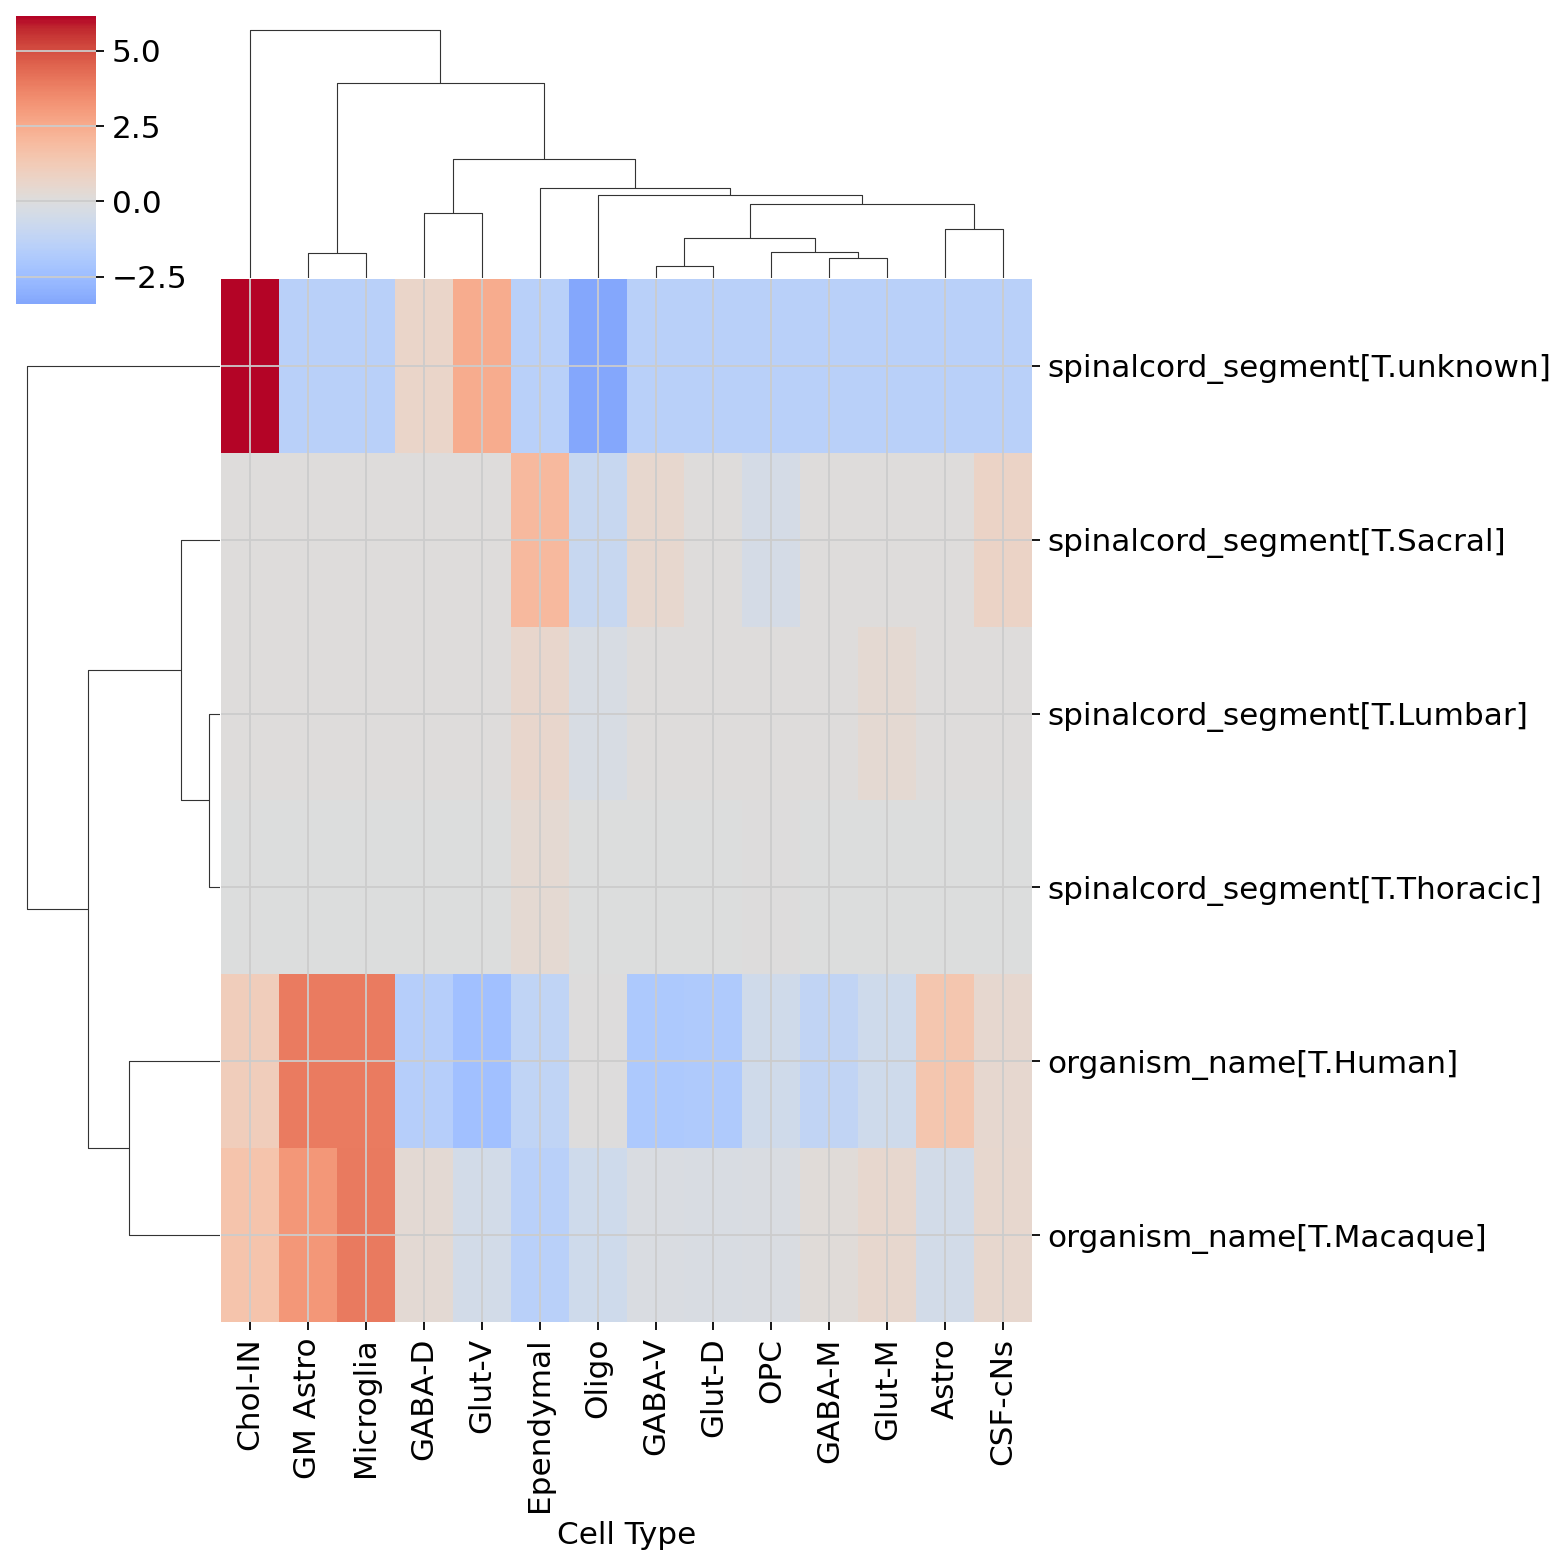

In [86]:
seaborn.clustermap(df,cmap='coolwarm',center=0,xticklabels=True,yticklabels=True)


In [58]:
res.summary()

Compositional Analysis summary:

Data: 35 samples, 14 cell types
Reference index: 7
Formula: organism_name + spinalcord_segment

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
Astro                3.723       504.857497
CSF-cNs              0.703        24.637661
Chol-IN              0.307        16.581311
Ependymal            2.702       181.867101
GABA-D               3.735       510.952283
GABA-M               2.657       173.864491
GABA-V               3.366       353.285392
GM Astro            -1.539         2.617648
Glut-D               4.325       921.751999
Glut-M               2.349       127.775677
Glut-V               3.508       407.188493
Microglia            1.685        65.777393
OPC                  2.713       183.878682
Oligo                5.004      1817.607229


Effects:
                                         Final Parameter  Expected Sample  \
Covariate                     Cell Type                            

In [56]:
res.posterior

<xarray.Dataset> Size: 77MB
Dimensions:        (chain: 1, draw: 15000, cell_type: 14, covariate: 2,
                    cell_type_nb: 13, sample: 35, sigma_d_dim_1: 1)
Coordinates:
  * chain          (chain) int64 8B 0
  * draw           (draw) int64 120kB 0 1 2 3 4 ... 14996 14997 14998 14999
  * cell_type      (cell_type) <U9 504B 'Astro' 'CSF-cNs' ... 'OPC' 'Oligo'
  * covariate      (covariate) <U24 192B 'organism_name[T.Macaque]' 'organism...
  * cell_type_nb   (cell_type_nb) <U9 468B 'Astro' 'CSF-cNs' ... 'OPC' 'Oligo'
  * sample         (sample) int64 280B 0 1 2 3 4 5 6 7 ... 28 29 30 31 32 33 34
  * sigma_d_dim_1  (sigma_d_dim_1) int64 8B 0
Data variables:
    alpha          (chain, draw, cell_type) float64 2MB 2.052 -1.178 ... 2.458
    b_offset       (chain, draw, covariate, cell_type_nb) float64 3MB -1.074 ...
    b_raw          (chain, draw, covariate, cell_type_nb) float64 3MB -1.047 ...
    beta           (chain, draw, covariate, cell_type) float64 3MB -1.047 ......
    concentration  (chain, draw, sample, cell_type) float64 59MB 7.782 ... 11.69
    ind            (chain, draw, covariate, cell_type_nb) float64 3MB 1.0 ......
    ind_raw        (chain, draw, covariate, cell_type_nb) float64 3MB 2.655 ....
    sigma_d        (chain, draw, covariate, sigma_d_dim_1) float64 240kB 0.97...
Attributes:
    created_at:     2025-10-01T04:11:44.435836+00:00
    arviz_version:  0.22.0

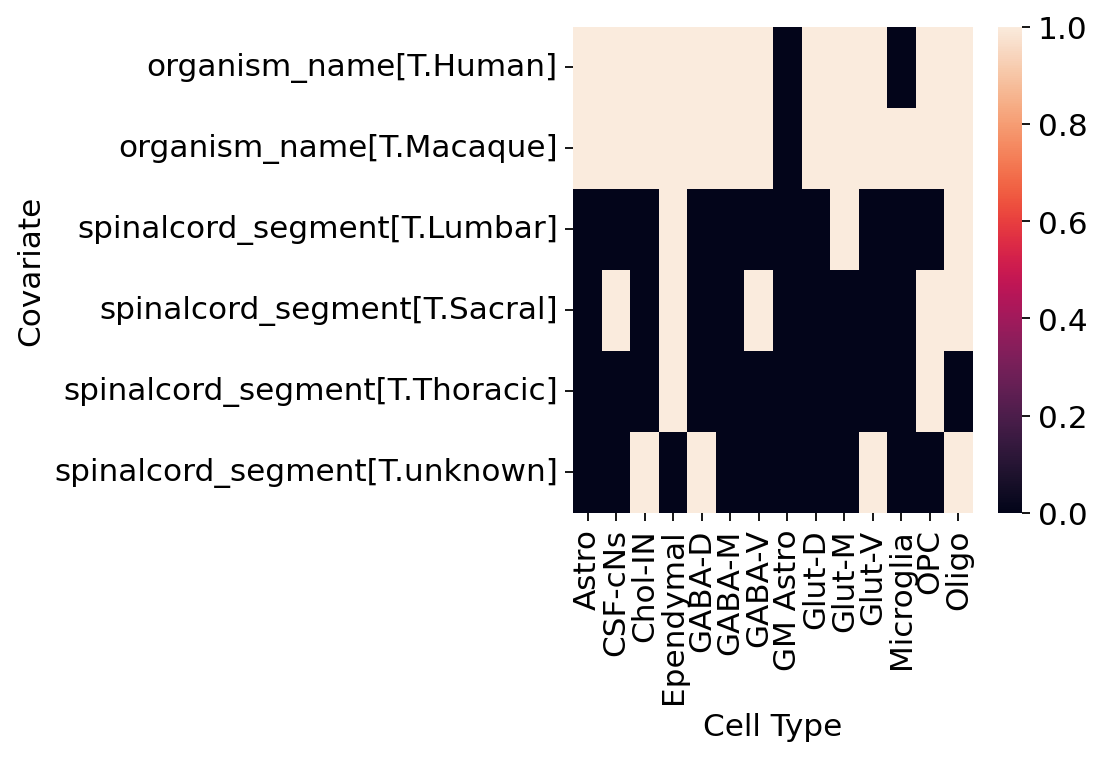

In [81]:
seaborn.heatmap(credible.unstack(),xticklabels=True,yticklabels=True)
plt.grid(None)

In [26]:
sccoda.cell_composition_data.from_pandas()

AttributeError: module 'sccoda' has no attribute 'cell_composition_data'

In [ ]:
model_salm = mod.CompositionalAnalysis(data_salm, formula="Condition", reference_cell_type="Goblet")


/scratch/fast/3628313/ipykernel_419147/3470339115.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp_df=obs.groupby(species_key)[leaf_key].value_counts(normalize=True).unstack()


Group          Alpha-MN  Gamma-MN  Gamma_star-MN  Visceral-MN   Chol-IN  \
organism_name                                                             
Human          0.000231  0.000046       0.000000     0.000784  0.000369   
Macaque        0.000348  0.000807       0.000269     0.001060  0.002357   
Mouse          0.006589  0.001730       0.001806     0.005020  0.004122   

Group          Glut-D-2  Glut-D-3  Glut-D-1  Glut-D-5  Glut-D-7  ...  \
organism_name                                                    ...   
Human          0.006184  0.006922  0.007337  0.006184  0.010198  ...   
Macaque        0.012355  0.024964  0.013621  0.023002  0.012229  ...   
Mouse          0.008924  0.015078  0.008659  0.015390  0.009803  ...   

Group           Oligo-1   Oligo-2  Oligo Progenitor       OPC  WM Astro  \
organism_name                                                             
Human          0.248823  0.071943          0.000461  0.021966  0.198892   
Macaque        0.089224  0.090537     

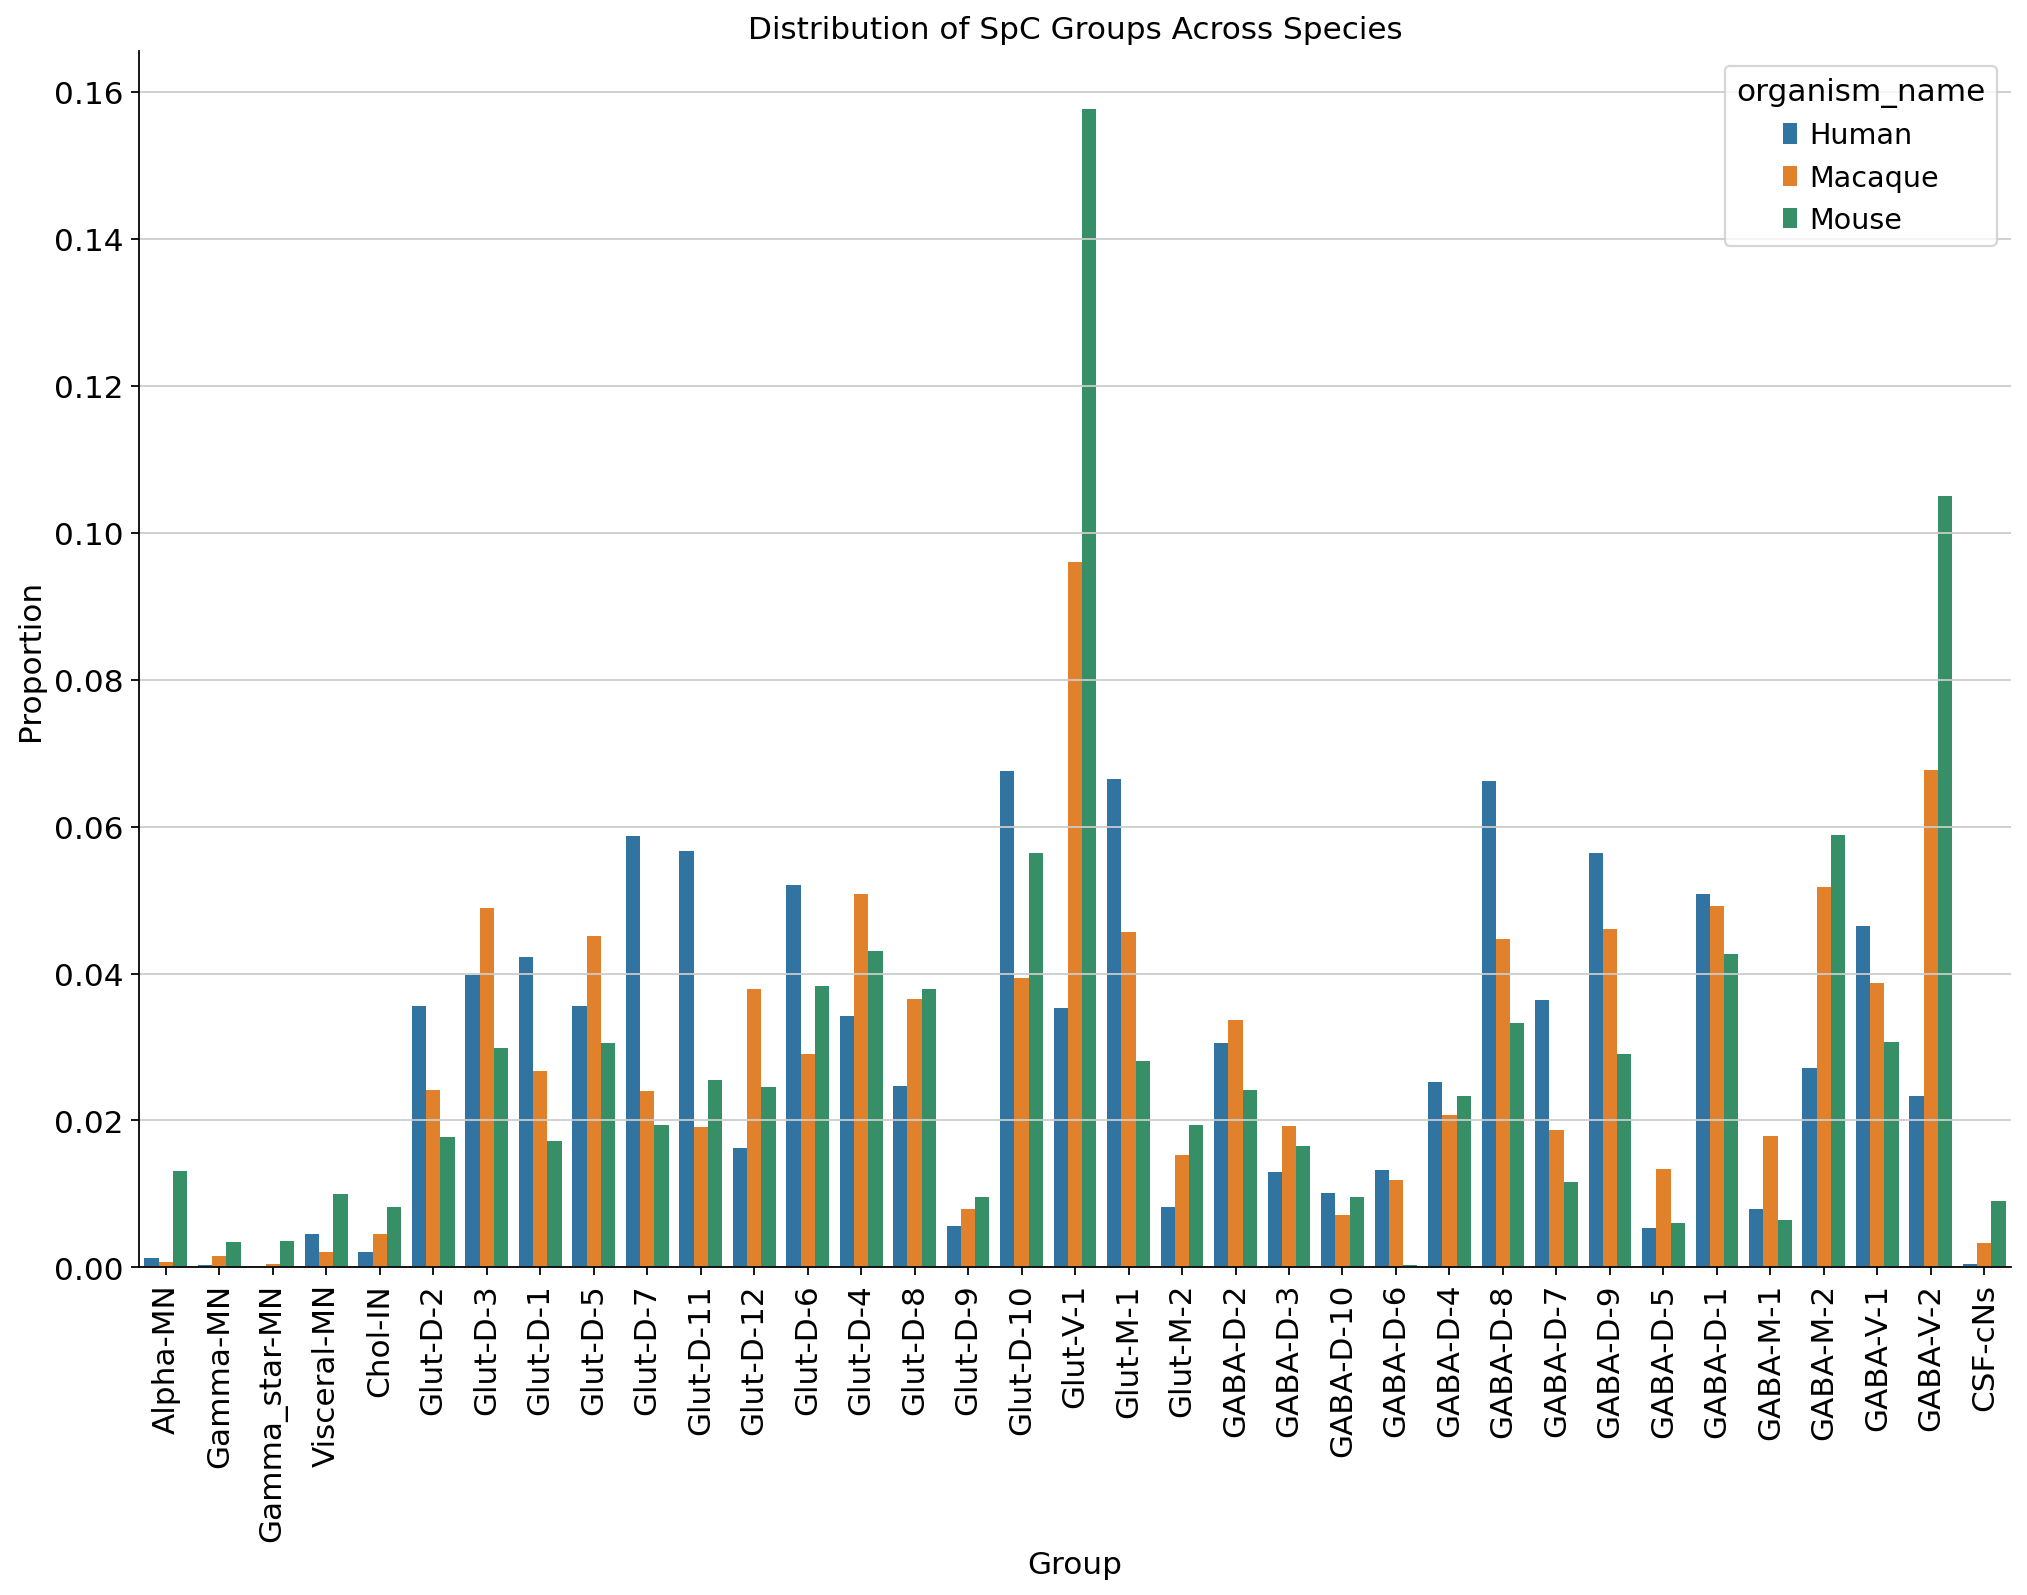

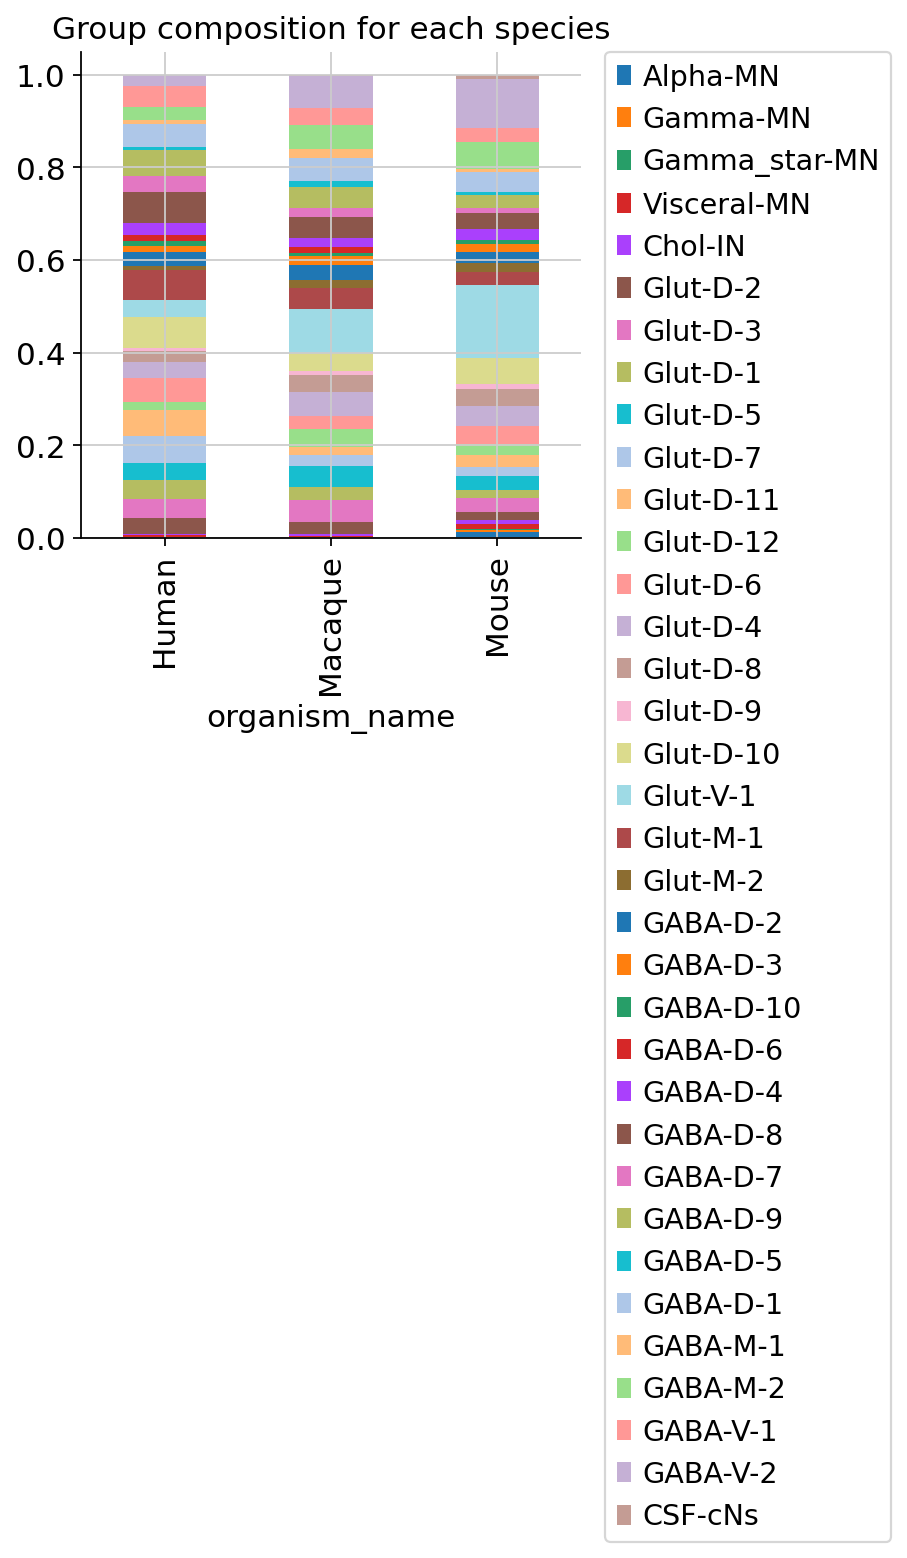

In [20]:
comp_df=obs.groupby(species_key)[leaf_key].value_counts(normalize=True).unstack()
print(comp_df)
comp_df=comp_df.loc[:,~comp_df.columns.str.contains('Endo|Astro|OPC|Oligo|VLMC|Micro|Mening|Schwann|Epen|Lymph|Macro|Peri')]
comp_df=(comp_df.T/comp_df.sum(1)).T
comp_df[species_key]=comp_df.index

# Melt the DataFrame
df_melted = pd.melt(comp_df, id_vars=species_key, var_name='Cell_Type', value_name='Value')

# Create the barplot
plt.figure(figsize=(15, 10))
seaborn.barplot(data=df_melted, x='Cell_Type', y='Value', hue=species_key)
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.title('Distribution of SpC Groups Across Species')
plt.ylabel('Proportion')
plt.xlabel('Group')
plt.legend(title=species_key)
plt.savefig(os.path.join(sc.settings.figdir, 'composition_barplot.svg'), format='svg')
plt.show()


comp_df.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Group composition for each species')
plt.grid(True,axis='y')
plt.show()

In [17]:
proportion_df=obs.groupby(species_key)[leaf_key].value_counts(normalize=True).unstack()
proportion_df[species_key]=proportion_df.index
proportion_df=proportion_df.melt(id_vars=species_key, var_name=leaf_key, value_name='Proportion')
# proportion_df = proportion_df.merge(trait_tab, how='left', left_on=species_key, right_on=species_key)
# proportion_df

/scratch/fast/3585043/ipykernel_512425/357453402.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df=obs.groupby(species_key)[leaf_key].value_counts(normalize=True).unstack()


In [18]:
proportion_df = obs.loc[~obs['Class'].isin(['non-neuronal','nan']),:].groupby([species_key, batch_key])[leaf_key].value_counts(normalize=True).unstack()

# # Reset index to convert the grouped indices into columns
proportion_df = proportion_df.reset_index()

proportion_df = proportion_df.loc[proportion_df.iloc[:,2:].sum(1)>0.9,:]

mean_proportions = proportion_df.iloc[:,2:].mean(0)

# Melt the DataFrame to long format
proportion_df = proportion_df.melt(id_vars=[species_key, batch_key], var_name=leaf_key, value_name='Proportion')

# Merge with trait_tab to include additional columns from trait_tab
# proportion_df = proportion_df.merge(trait_tab, how='left', left_on=species_key, right_on=species_key)

proportion_df['Log2Proportion']=np.log2(proportion_df['Proportion']+proportion_df['Proportion'][proportion_df['Proportion']>0.].min()*0.5)
proportion_df['LogitProportion']=scipy.special.logit(proportion_df['Proportion']+proportion_df['Proportion'][proportion_df['Proportion']>0.].min()*0.5)

# Display the resulting DataFrame
print(proportion_df)


     organism_name    load_id        Group  Proportion  Log2Proportion  \
0            Human   1048_A05     Alpha-MN    0.000192      -12.033609   
1            Human   1319_A03     Alpha-MN    0.000000      -14.397942   
2            Human    858_B03     Alpha-MN    0.000457      -10.956919   
3            Human    858_C03     Alpha-MN    0.000000      -14.397942   
4            Human    875_A04     Alpha-MN    0.000849      -10.125473   
...            ...        ...          ...         ...             ...   
1710         Mouse    788_B02  Macrophages    0.000000      -14.397942   
1711         Mouse  792.1_A04  Macrophages    0.000000      -14.397942   
1712         Mouse  792.1_B04  Macrophages    0.000000      -14.397942   
1713         Mouse  792.2_A05  Macrophages    0.000000      -14.397942   
1714         Mouse  792.2_B05  Macrophages    0.000000      -14.397942   

      LogitProportion  
0           -8.340824  
1           -9.979847  
2           -7.594254  
3           -9.

/scratch/fast/3585043/ipykernel_512425/1740774480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = obs.loc[~obs['Class'].isin(['non-neuronal','nan']),:].groupby([species_key, batch_key])[leaf_key].value_counts(normalize=True).unstack()


/scratch/fast/3585043/ipykernel_512425/4270286526.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby([species_key, batch_key])['Class'].value_counts(normalize=True).reset_index(name='proportion')
/scratch/fast/3585043/ipykernel_512425/4270286526.py:13: UserWarning: The palette list has more values (20) than needed (3), which may not be intended.
  seaborn.boxplot(x=species_key, y='proportion', hue=species_key, data=grouped_df,showfliers = False,palette=sc.pl.palettes.vega_20)
/scratch/fast/3585043/ipykernel_512425/4270286526.py:14: UserWarning: The palette list has more values (20) than needed (3), which may not be intended.
  seaborn.stripplot(x=species_key, y='proportion', hue=species_key, data=grouped_df, dodge=False,linewidth=0.4,palette=sc.pl.palettes.vega_20

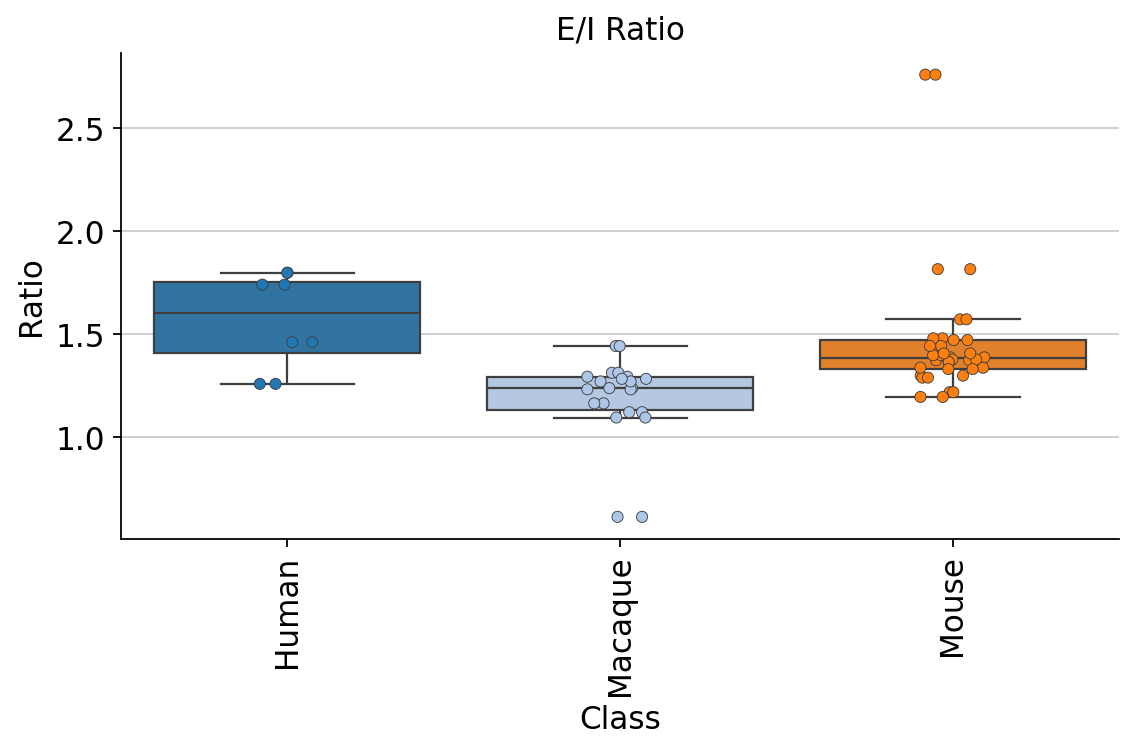

In [19]:
filtered_df = obs.loc[~obs['Class'].isin(['Cholinergic', 'Motor Neurons', 'Non-Neurons','nan']), :]
vcs = filtered_df[batch_key].value_counts()
filtered_df = filtered_df.loc[filtered_df[batch_key].isin(vcs.index[vcs>100]),:]
grouped_df = filtered_df.groupby([species_key, batch_key])['Class'].value_counts(normalize=True).reset_index(name='proportion')
grouped_df.index = grouped_df[batch_key]

# Remove rows with 0 counts
grouped_df = grouped_df[grouped_df['proportion'] > 0]
grouped_df['proportion'] = grouped_df.loc[grouped_df['Class']=='Glutamatergic','proportion']/grouped_df.loc[grouped_df['Class']=='GABAergic','proportion']

# Create the strip plot
plt.figure(figsize=(8, 4))
seaborn.boxplot(x=species_key, y='proportion', hue=species_key, data=grouped_df,showfliers = False,palette=sc.pl.palettes.vega_20)
seaborn.stripplot(x=species_key, y='proportion', hue=species_key, data=grouped_df, dodge=False,linewidth=0.4,palette=sc.pl.palettes.vega_20)
plt.title('E/I Ratio')
plt.xlabel('Class')
plt.ylabel('Ratio')
#plt.legend(title=species_key,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()


/scratch/fast/3585043/ipykernel_512425/2030561989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Subclass'] = filtered_df['Subclass'].cat.remove_unused_categories()
/scratch/fast/3585043/ipykernel_512425/2030561989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Subclass'] = filtered_df['Subclass'].cat.reorder_categories([ 'Glut-D', 'GABA-D', 'Glut-M', 'GABA-M', 'Glut-V', 'GABA-V', 'CSF-cNs','Chol-IN'])
/scratch/fast/3585043/ipykernel_512425/2030561989.py:7: FutureWarning:

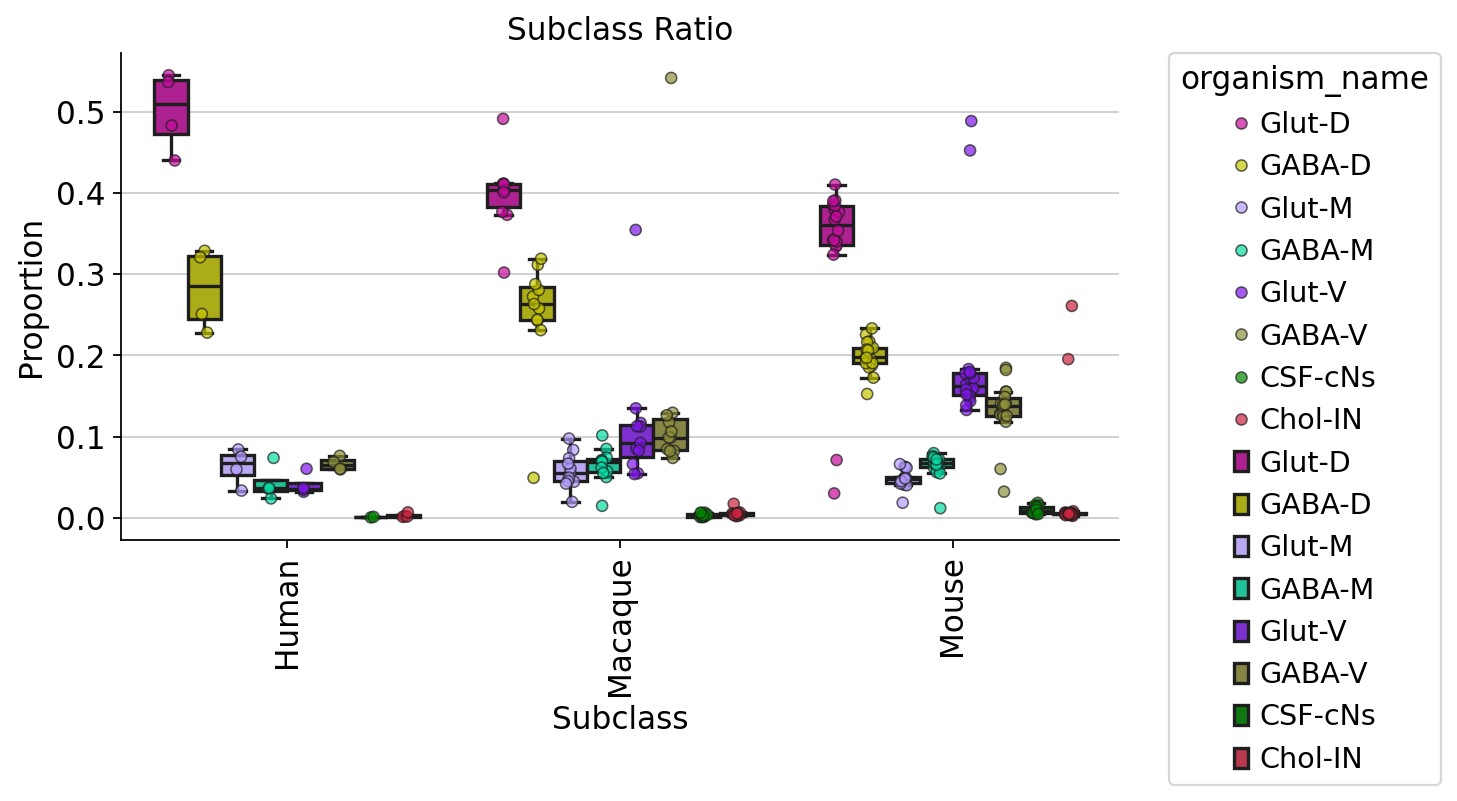

In [27]:
filtered_df = obs.loc[~obs['Class'].isin(['Motor Neurons', 'Non-Neurons','nan']), :]
filtered_df['Subclass'] = filtered_df['Subclass'].cat.remove_unused_categories()
filtered_df['Subclass'] = filtered_df['Subclass'].cat.reorder_categories([ 'Glut-D', 'GABA-D', 'Glut-M', 'GABA-M', 'Glut-V', 'GABA-V', 'CSF-cNs','Chol-IN'])
vcs = filtered_df[batch_key].value_counts()
filtered_df = filtered_df.loc[filtered_df[batch_key].isin(vcs.index[vcs>100]),:]

grouped_df = filtered_df.groupby([species_key, batch_key,'spinalcord_segment'])['Subclass'].value_counts(normalize=True).reset_index(name='proportion')
grouped_df.index = grouped_df[batch_key]

# Remove rows with 0 counts
grouped_df = grouped_df[grouped_df['proportion'] > 0]
plt.figure(figsize=(8, 4))
seaborn.stripplot(x=species_key, y='proportion', hue='Subclass', data=grouped_df, dodge=True,linewidth=0.7,alpha=0.7,palette=uns['Subclass_colors_dict'])
seaborn.boxplot(x=species_key, y='proportion', hue='Subclass', data=grouped_df,showfliers = False,linewidth=1.5,palette=uns['Subclass_colors_dict'])
plt.title('Subclass Ratio')
plt.xlabel('Subclass')
plt.ylabel('Proportion')
plt.legend(title=species_key,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)  # Rotate the x labels for better readability
# plt.savefig(os.path.join(sc.settings.figdir, 'overall_composition_boxplot.svg'), format='svg')
plt.show()



/scratch/fast/3585043/ipykernel_512425/2737373211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Subclass'] = filtered_df['Subclass'].cat.remove_unused_categories()
/scratch/fast/3585043/ipykernel_512425/2737373211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Subclass'] = filtered_df['Subclass'].cat.reorder_categories([ 'Glut-D', 'GABA-D', 'Glut-M', 'GABA-M', 'Glut-V', 'GABA-V', 'CSF-cNs','Chol-IN'])
/scratch/fast/3585043/ipykernel_512425/2737373211.py:7: FutureWarning:

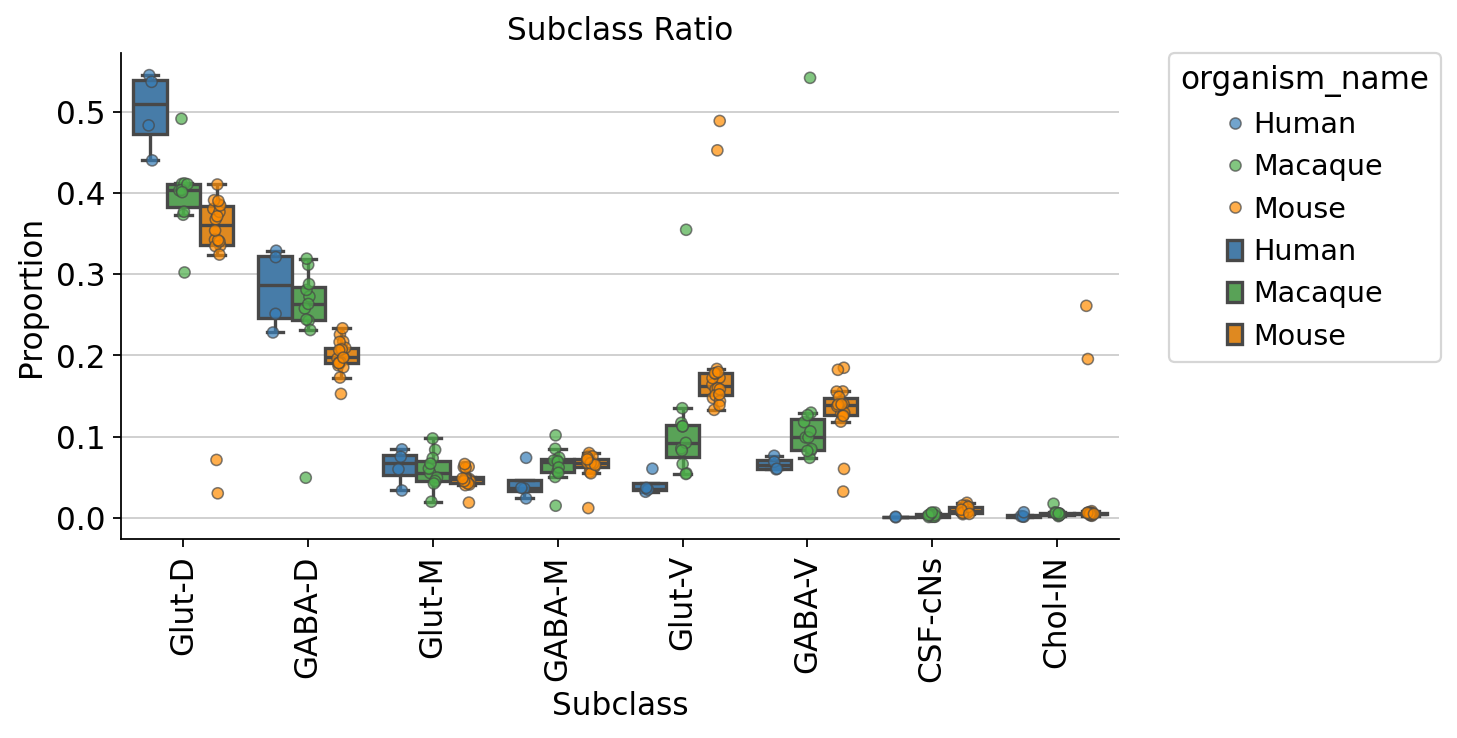

In [28]:
filtered_df = obs.loc[~obs['Class'].isin(['Motor Neurons', 'Non-Neurons','nan']), :]
filtered_df['Subclass'] = filtered_df['Subclass'].cat.remove_unused_categories()
filtered_df['Subclass'] = filtered_df['Subclass'].cat.reorder_categories([ 'Glut-D', 'GABA-D', 'Glut-M', 'GABA-M', 'Glut-V', 'GABA-V', 'CSF-cNs','Chol-IN'])
vcs = filtered_df[batch_key].value_counts()
filtered_df = filtered_df.loc[filtered_df[batch_key].isin(vcs.index[vcs>100]),:]

grouped_df = filtered_df.groupby([species_key, batch_key,'spinalcord_segment'])['Subclass'].value_counts(normalize=True).reset_index(name='proportion')
grouped_df.index = grouped_df[batch_key]

# Remove rows with 0 counts
grouped_df = grouped_df[grouped_df['proportion'] > 0]
plt.figure(figsize=(8, 4))
seaborn.stripplot(hue=species_key, y='proportion', x='Subclass', data=grouped_df, dodge=True,linewidth=0.7,alpha=0.7,palette=uns[f'{species_key}_color_dict'])
seaborn.boxplot(hue=species_key, y='proportion', x='Subclass', data=grouped_df,showfliers = False,linewidth=1.5,palette=uns[f'{species_key}_color_dict'])
plt.title('Subclass Ratio')
plt.xlabel('Subclass')
plt.ylabel('Proportion')
plt.legend(title=species_key,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.savefig(os.path.join(sc.settings.figdir, 'overall_composition_boxplot.svg'), format='svg')
plt.show()



In [ ]:
grouped_df

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_df = grouped_df.loc[grouped_df['spinalcord_segment'] != 'unknown']

# 1) pivot to Subclass × Species
df_wide = (
    grouped_df
    .pivot_table(
        index='Subclass',
        columns=['organism_name','spinalcord_segment'],
        values='proportion',
        aggfunc='mean'
    )
    .dropna()    # drop any subclasses missing a species
)

# 2) center
species = df_wide.columns.tolist()
means = df_wide.mean(axis=0)
M = df_wide - means

# 3) SVD
U, S, Vt = np.linalg.svd(M.values, full_matrices=False)

# 4) first principal direction
pc1 = Vt[0]  # shape (n_species,)

# 5) set up for plotting
df_plot = df_wide.reset_index()
pairs = [
    (species[i], species[j])
    for i in range(len(species))
    for j in range(i+1, len(species))
]

for x_spec, y_spec in pairs:
    i, j = species.index(x_spec), species.index(y_spec)
    slope = pc1[j] / pc1[i]
    intercept = means[y_spec] - slope * means[x_spec]

    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=df_plot,
        x=x_spec, y=y_spec,
        hue='Subclass',
        palette=uns['Subclass_colors_dict'],
        legend=True
    )

    # line over the current x‑range
    xlims = plt.gca().get_xlim()
    xs = np.array(xlims)
    ys = slope * xs + intercept
    plt.plot(xs, ys, color='black', lw=1)

    plt.xlabel(f'{x_spec} proportion')
    plt.ylabel(f'{y_spec} proportion')
    plt.title(f'{x_spec} vs {y_spec} (PC1 slope)')
    plt.legend(title=species_key,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()


/scratch/fast/3585043/ipykernel_512425/3845976132.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby([species_key, batch_key])['Subclass'].value_counts(normalize=True).reset_index(name='proportion')


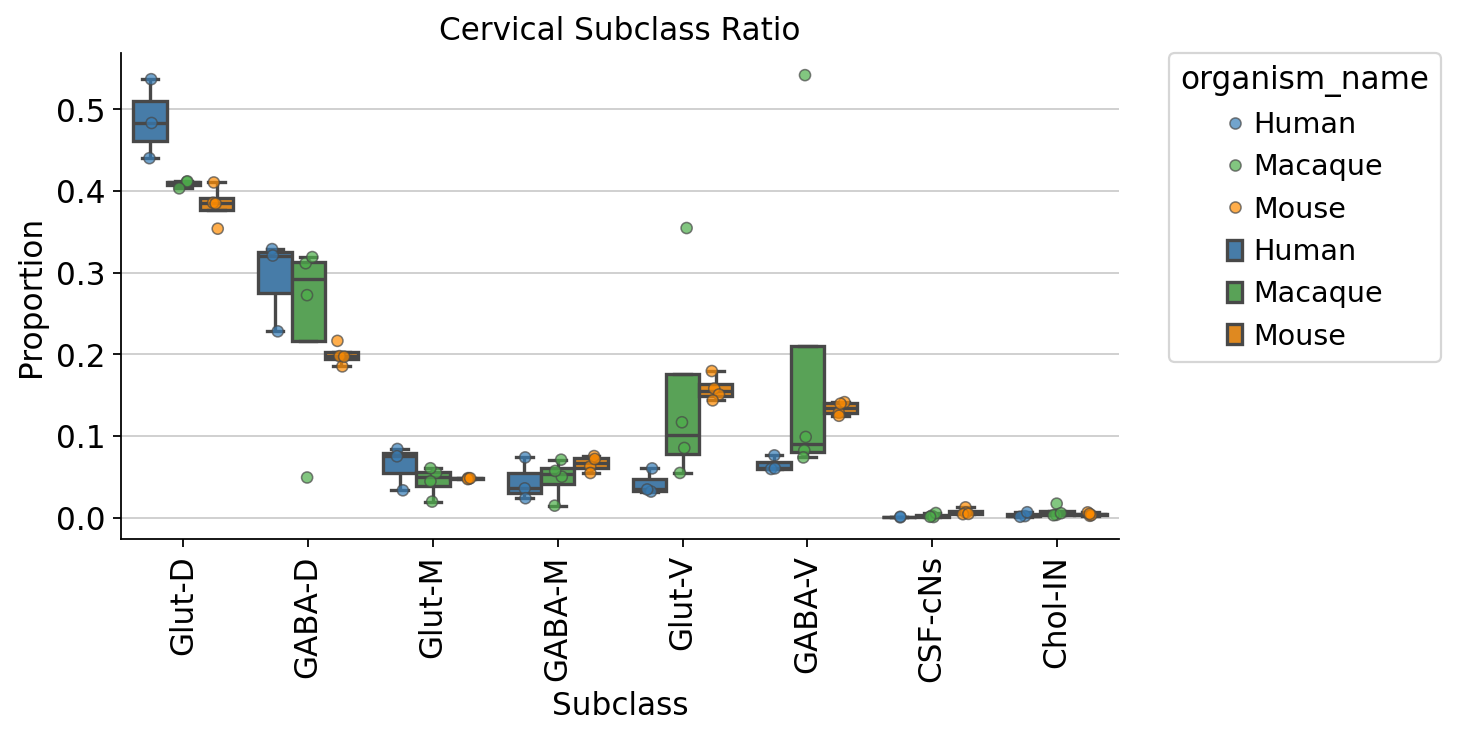

/scratch/fast/3585043/ipykernel_512425/3845976132.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby([species_key, batch_key])['Subclass'].value_counts(normalize=True).reset_index(name='proportion')


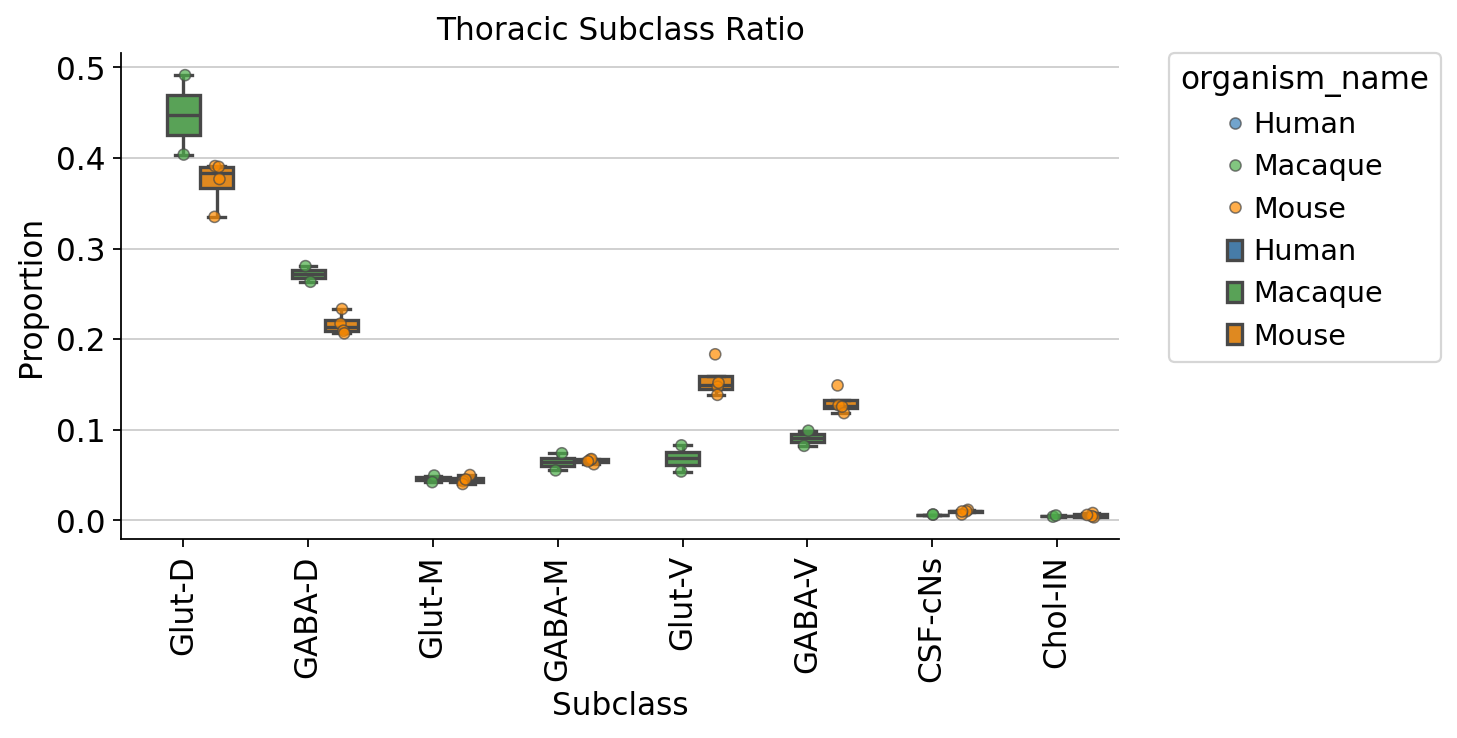

/scratch/fast/3585043/ipykernel_512425/3845976132.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby([species_key, batch_key])['Subclass'].value_counts(normalize=True).reset_index(name='proportion')


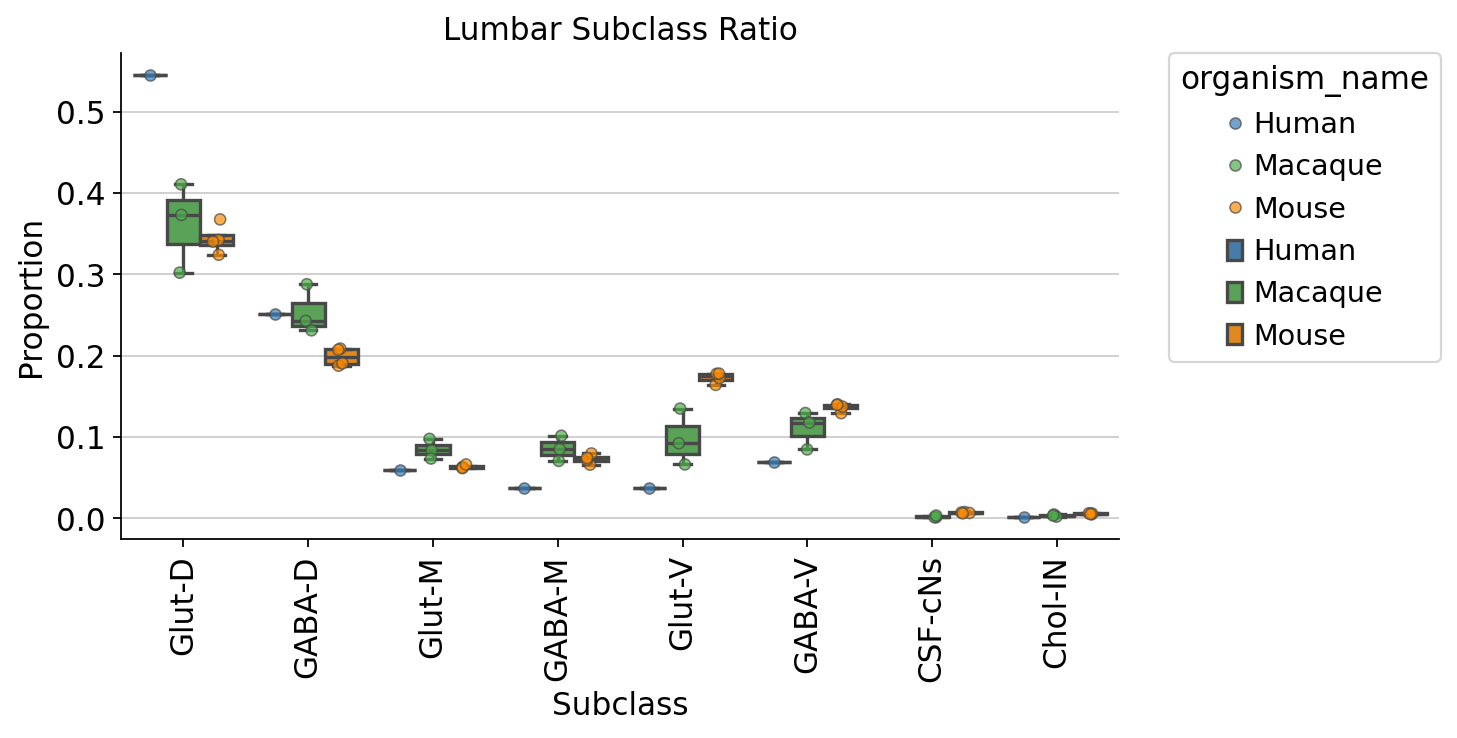

/scratch/fast/3585043/ipykernel_512425/3845976132.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby([species_key, batch_key])['Subclass'].value_counts(normalize=True).reset_index(name='proportion')


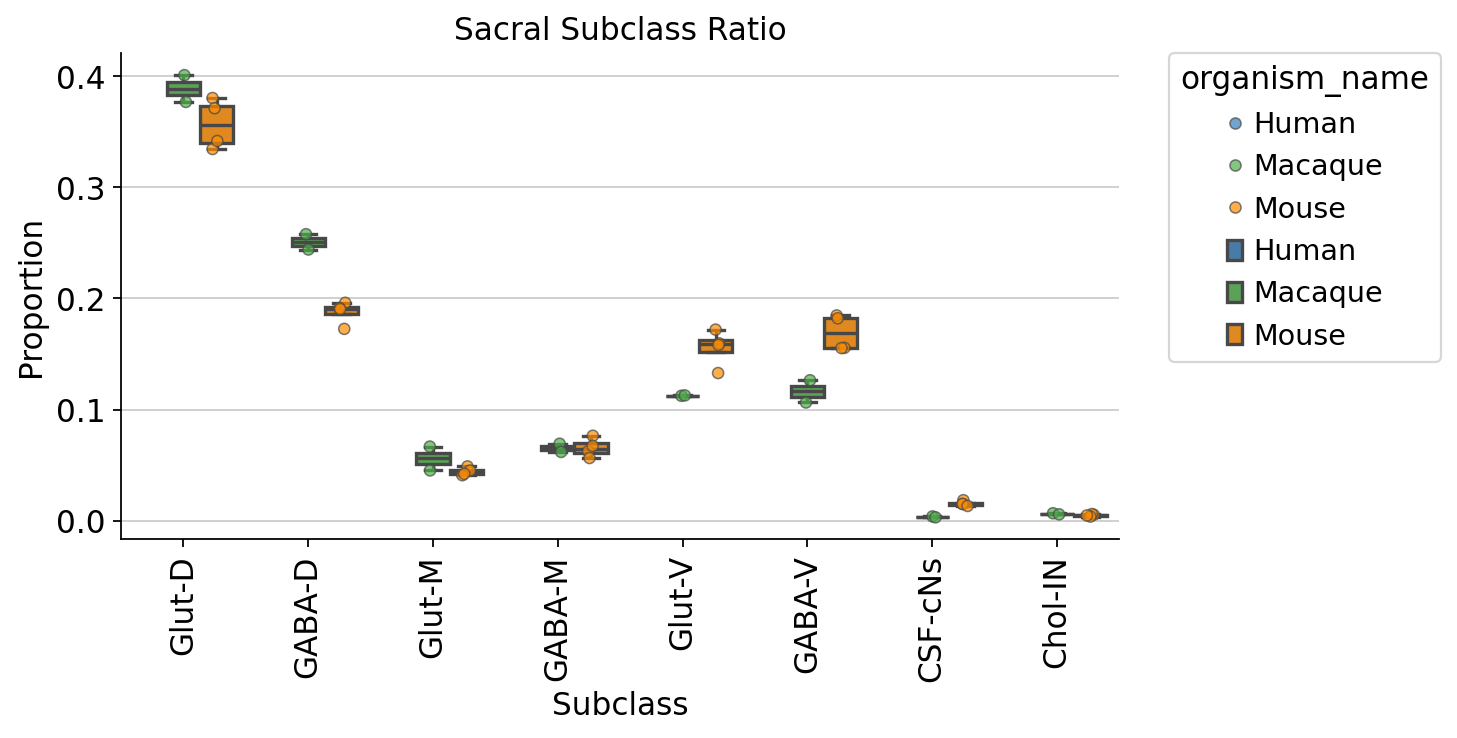

In [32]:
for segment in ['Cervical', 'Thoracic', 'Lumbar', 'Sacral']:
    filtered_df = obs.loc[~obs['Class'].isin(['Motor Neurons', 'Non-Neurons','nan']), :]
    vcs = filtered_df[batch_key].value_counts()
    filtered_df = filtered_df.loc[filtered_df[batch_key].isin(vcs.index[vcs>100]),:]
    filtered_df = filtered_df.loc[filtered_df['spinalcord_segment'] == segment,:]
    filtered_df['Subclass'] = filtered_df['Subclass'].cat.remove_unused_categories()
    filtered_df['Subclass'] = filtered_df['Subclass'].cat.reorder_categories([ 'Glut-D', 'GABA-D', 'Glut-M', 'GABA-M', 'Glut-V', 'GABA-V', 'CSF-cNs','Chol-IN'])
    grouped_df = filtered_df.groupby([species_key, batch_key])['Subclass'].value_counts(normalize=True).reset_index(name='proportion')
    grouped_df.index = grouped_df[batch_key]
    
    # Remove rows with 0 counts
    grouped_df = grouped_df[grouped_df['proportion'] > 0]
    plt.figure(figsize=(8, 4))
    seaborn.stripplot(hue=species_key, y='proportion', x='Subclass', data=grouped_df, dodge=True,linewidth=0.7,alpha=0.7,palette=uns[f'{species_key}_color_dict'])
    seaborn.boxplot(hue=species_key, y='proportion', x='Subclass', data=grouped_df,showfliers = False,linewidth=1.5,palette=uns[f'{species_key}_color_dict'])
    plt.title(f'{segment} Subclass Ratio')
    plt.xlabel('Subclass')
    plt.ylabel('Proportion')
    plt.legend(title=species_key,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=90)  # Rotate the x labels for better readability
    plt.savefig(os.path.join(sc.settings.figdir, f'overall_composition_{segment}_boxplot.svg'), format='svg')
    plt.show()


/scratch/fast/3585043/ipykernel_512425/3905430562.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([species_key, batch_key, 'study'])['Subclass']


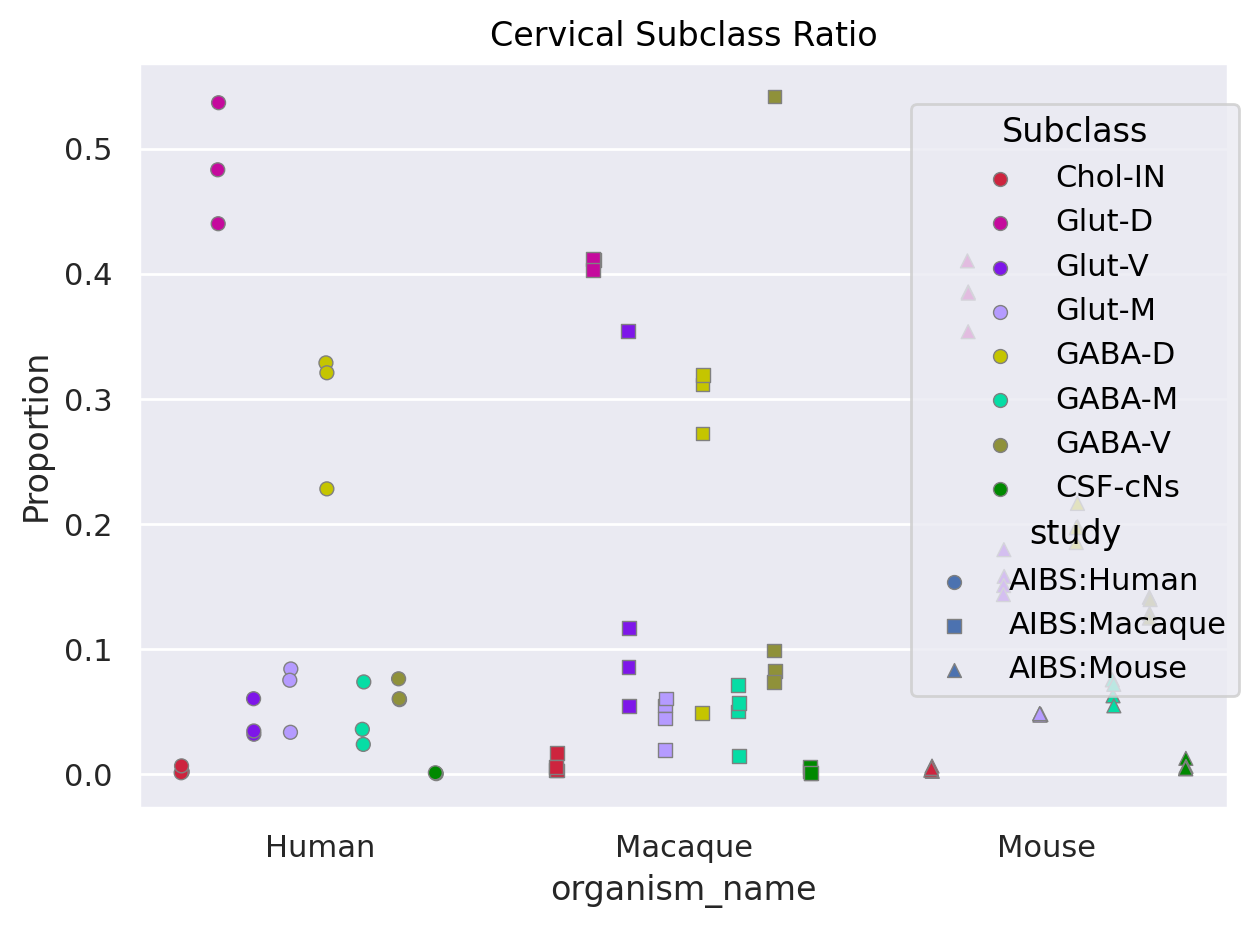

/scratch/fast/3585043/ipykernel_512425/3905430562.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([species_key, batch_key, 'study'])['Subclass']


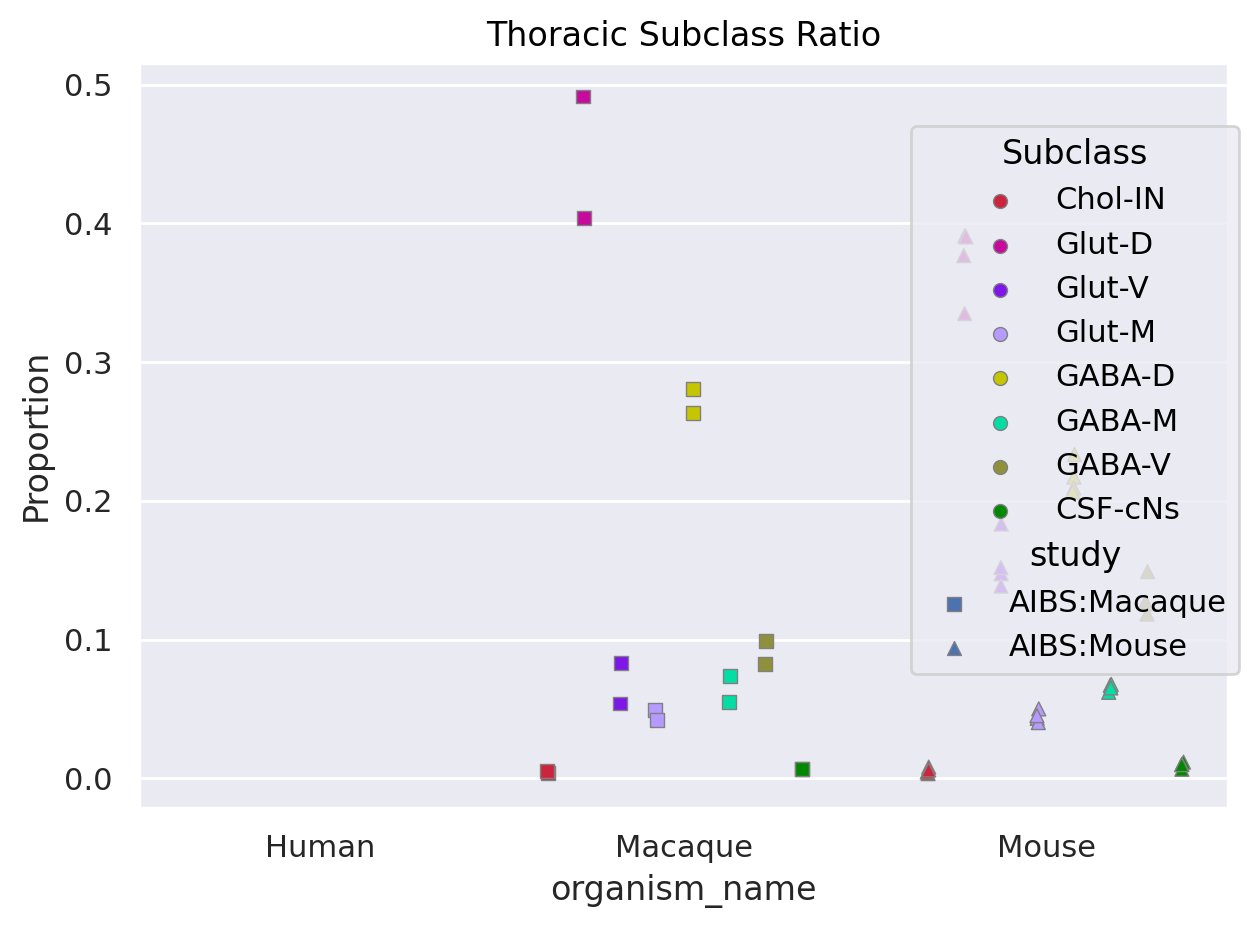

/scratch/fast/3585043/ipykernel_512425/3905430562.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([species_key, batch_key, 'study'])['Subclass']


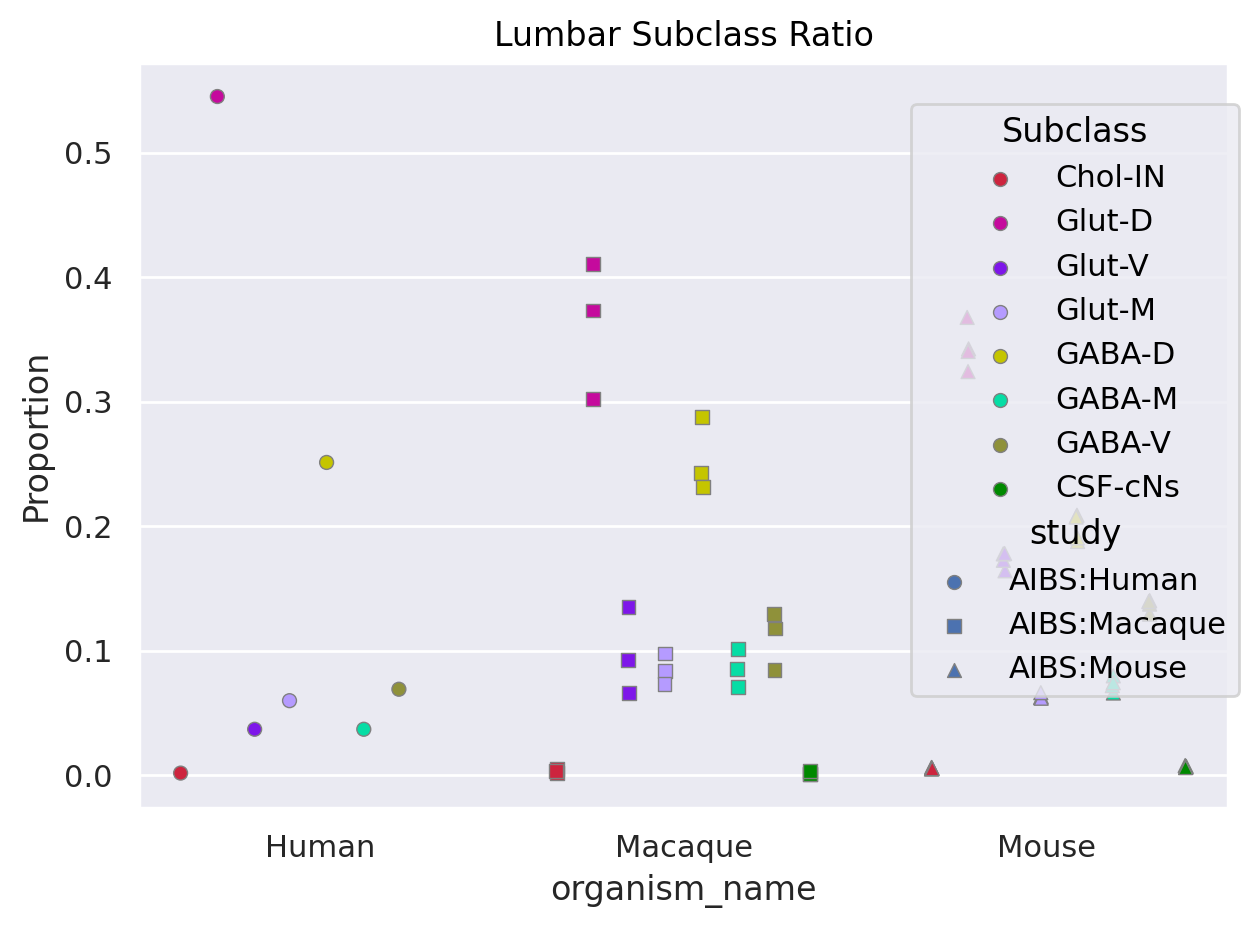

/scratch/fast/3585043/ipykernel_512425/3905430562.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([species_key, batch_key, 'study'])['Subclass']


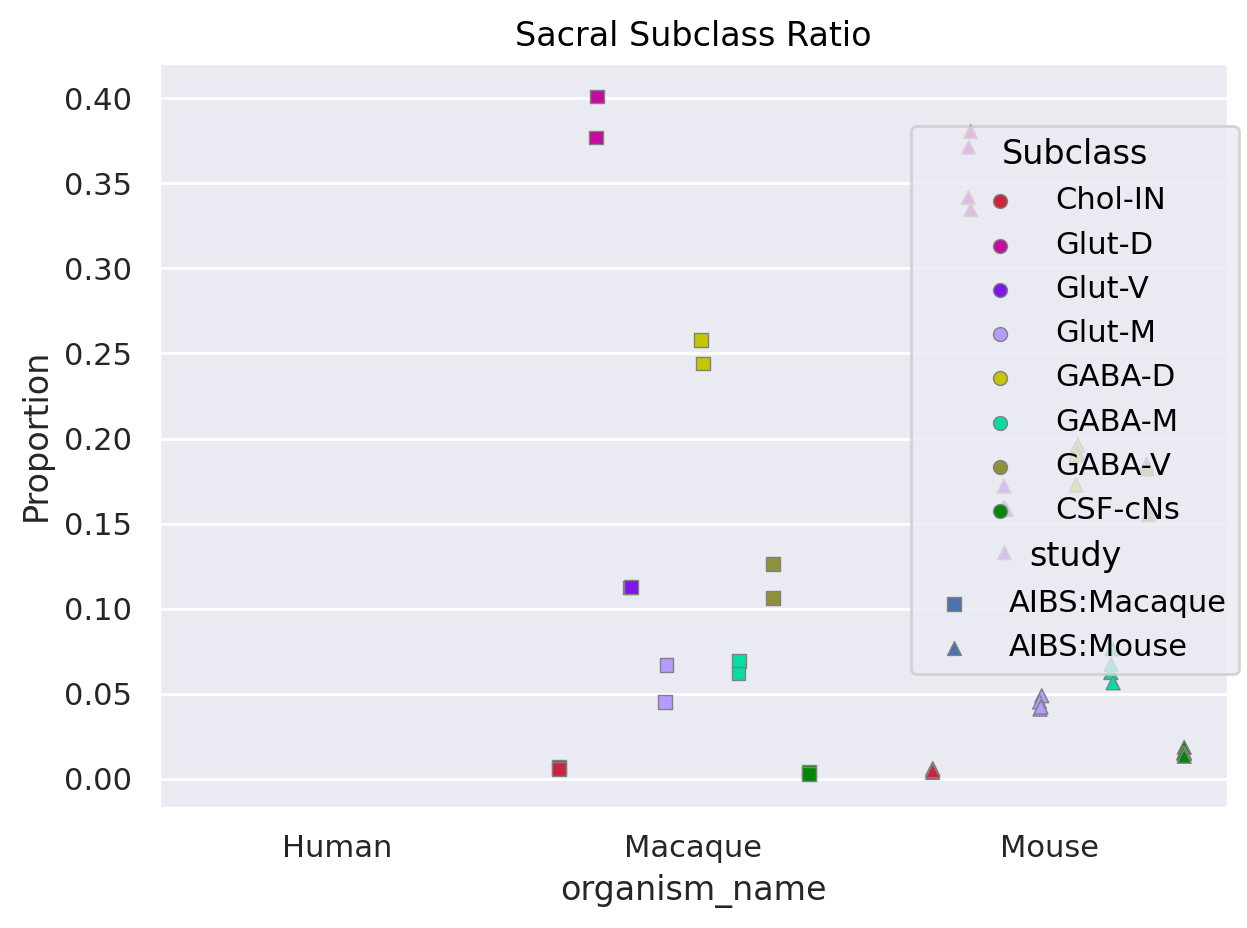

In [33]:
import seaborn.objects as so

# 1) define a marker for each study value
all_studies = obs['study'].dropna().unique()
# pick as many marker‐codes as you have studies
marker_list = ['o','s','^','v','D','X','P','*']
markdict = dict(zip(all_studies, marker_list[:len(all_studies)]))

for segment in ['Cervical', 'Thoracic', 'Lumbar', 'Sacral']:
    # ---- filter & compute proportions exactly as you had ----
    filtered = (
        obs
        .loc[obs['Class'].notna() & ~obs['Class'].isin(['Motor Neurons','Non-Neurons']), :]
        .copy()
    )
    vcs = filtered[batch_key].value_counts()
    filtered = filtered.loc[filtered[batch_key].isin(vcs.index[vcs>100]), :]
    filtered = filtered.loc[filtered['spinalcord_segment']==segment, :]
    filtered['Subclass'] = filtered['Subclass'].cat.remove_unused_categories()

    grouped_df = (
        filtered
        .groupby([species_key, batch_key, 'study'])['Subclass']
        .value_counts(normalize=True)
        .rename('proportion')
        .reset_index()
    )
    grouped_df = grouped_df[grouped_df['proportion']>0]
    # ---- plot with objects interface ----
    p = (
        so.Plot(grouped_df, x=species_key, y='proportion',
                color='Subclass', marker='study')
        # dot layer, with a bit of dodge + jitter
        .add(so.Dot(pointsize=5, edgecolor='gray'),
             so.Dodge(), so.Jitter(width=0.15))
        # apply your existing color palette and the new marker mapping
        .scale(
            color=so.Nominal(uns['Subclass_colors_dict']),
            marker=so.Nominal(markdict)
        )
        .label(
            x=species_key,
            y='Proportion',
            title=f'{segment} Subclass Ratio'
        )
    )
    p.show()


/scratch/fast/3585043/ipykernel_512425/2060894725.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([species_key, batch_key])['Subclass']
/scratch/fast/3585043/ipykernel_512425/2060894725.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = vc.pivot_table(


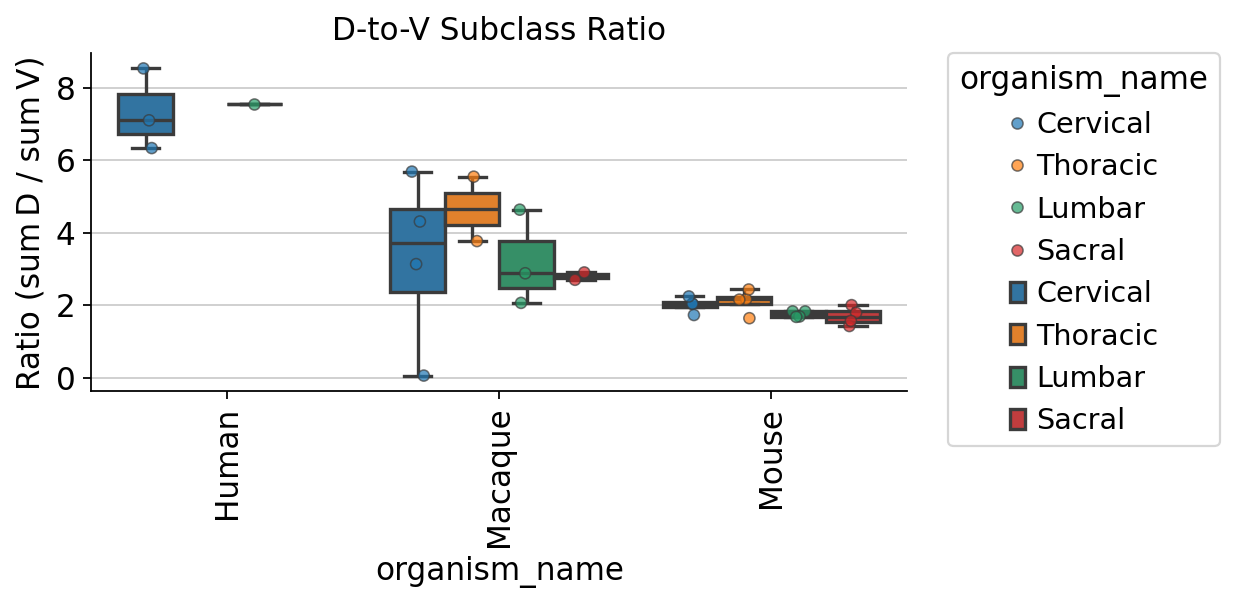

In [34]:
# 1) filter out the unwanted Classes (and true NaNs)
filtered = (
    obs
    .loc[obs['Class'].notna() & ~obs['Class'].isin(['Motor Neurons','Non-Neurons'])]
    .copy()
)
filtered['Subclass'] = filtered['Subclass'].cat.remove_unused_categories()

vcs = filtered[batch_key].value_counts()
filtered = filtered.loc[filtered[batch_key].isin(vcs.index[vcs>100]),:]


# 2) get normalized counts per Subclass
vc = (
    filtered
    .groupby([species_key, batch_key])['Subclass']
    .value_counts(normalize=True)
    .rename('proportion')
    .reset_index()
)

# 3) pivot so each Subclass becomes a column
pivot = vc.pivot_table(
    index=[species_key, batch_key],
    columns='Subclass',
    values='proportion',
    fill_value=0
)

# 4) aggregate all “D” subclasses and all “V” subclasses
d_cols = [c for c in pivot.columns if 'D' in c]
v_cols = [c for c in pivot.columns if 'V' in c]

pivot['D_sum'] = pivot[d_cols].sum(axis=1)
pivot['V_sum'] = pivot[v_cols].sum(axis=1)

# 5) compute ratio
pivot['ratio'] = pivot['D_sum'] / pivot['V_sum']

# 6) get back to a flat DataFrame
ratio_df = pivot['ratio'].reset_index()   # columns: [species_key, batch_key, 'ratio']

bs = obs.loc[:,[batch_key,'spinalcord_segment']].drop_duplicates()
bs_dict = dict(zip(bs[batch_key],bs['spinalcord_segment']))
ratio_df['spinalcord_segment'] = ratio_df[batch_key].replace(bs_dict)
ratio_df = ratio_df.loc[ratio_df['spinalcord_segment'] != 'unknown']
ratio_df['spinalcord_segment'] = ratio_df['spinalcord_segment'].astype('category')
ratio_df['spinalcord_segment'] = ratio_df['spinalcord_segment'].cat.reorder_categories(['Cervical','Thoracic','Lumbar','Sacral'])

plt.figure(figsize=(8,4))
seaborn.stripplot(
    x=species_key, y='ratio',hue='spinalcord_segment',
    data=ratio_df,
    dodge=True, linewidth=0.7, alpha=0.7
)
seaborn.boxplot(
    x=species_key, y='ratio',hue='spinalcord_segment',
    data=ratio_df,
    showfliers=False, linewidth=1.5
)
plt.title('D-to-V Subclass Ratio')
plt.xlabel(species_key)
plt.ylabel('Ratio (sum D / sum V)')
plt.legend(title=species_key,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/scratch/fast/3585043/ipykernel_512425/1815765984.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([species_key, batch_key])['Subclass']
/scratch/fast/3585043/ipykernel_512425/1815765984.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = vc.pivot_table(


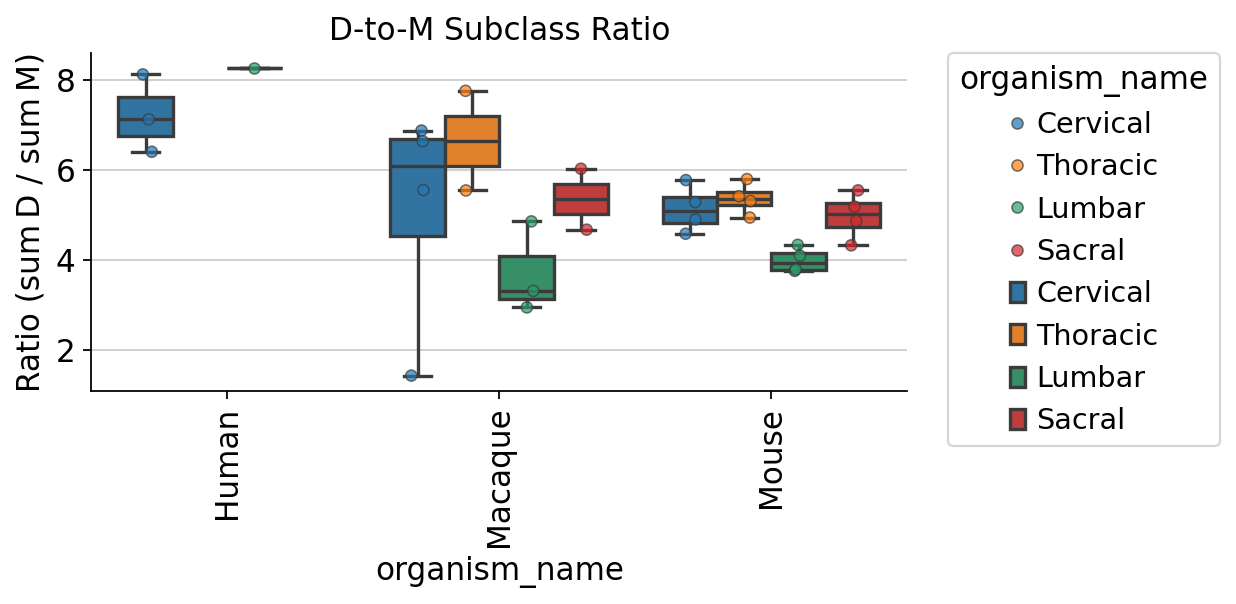

In [35]:
# 1) filter out the unwanted Classes (and true NaNs)
filtered = (
    obs
    .loc[obs['Class'].notna() & ~obs['Class'].isin(['Motor Neurons','Non-Neurons'])]
    .copy()
)
vcs = filtered[batch_key].value_counts()
filtered = filtered.loc[filtered[batch_key].isin(vcs.index[vcs>100]),:]
filtered['Subclass'] = filtered['Subclass'].cat.remove_unused_categories()

# 2) get normalized counts per Subclass
vc = (
    filtered
    .groupby([species_key, batch_key])['Subclass']
    .value_counts(normalize=True)
    .rename('proportion')
    .reset_index()
)

# 3) pivot so each Subclass becomes a column
pivot = vc.pivot_table(
    index=[species_key, batch_key],
    columns='Subclass',
    values='proportion',
    fill_value=0
)

# 4) aggregate all “D” subclasses and all “M” subclasses
d_cols = [c for c in pivot.columns if 'D' in c]
v_cols = [c for c in pivot.columns if 'M' in c]

pivot['D_sum'] = pivot[d_cols].sum(axis=1)
pivot['M_sum'] = pivot[v_cols].sum(axis=1)

# 5) compute ratio
pivot['ratio'] = pivot['D_sum'] / pivot['M_sum']

# 6) get back to a flat DataFrame
ratio_df = pivot['ratio'].reset_index()   # columns: [species_key, batch_key, 'ratio']

bs = obs.loc[:,[batch_key,'spinalcord_segment']].drop_duplicates()
bs_dict = dict(zip(bs[batch_key],bs['spinalcord_segment']))
ratio_df['spinalcord_segment'] = ratio_df[batch_key].replace(bs_dict)
ratio_df = ratio_df.loc[ratio_df['spinalcord_segment'] != 'unknown']
ratio_df['spinalcord_segment'] = ratio_df['spinalcord_segment'].astype('category')
ratio_df['spinalcord_segment'] = ratio_df['spinalcord_segment'].cat.reorder_categories(['Cervical','Thoracic','Lumbar','Sacral'])

plt.figure(figsize=(8,4))
seaborn.stripplot(
    x=species_key, y='ratio',hue='spinalcord_segment',
    data=ratio_df,
    dodge=True, linewidth=0.7, alpha=0.7
)
seaborn.boxplot(
    x=species_key, y='ratio',hue='spinalcord_segment',
    data=ratio_df,
    showfliers=False, linewidth=1.5
)
plt.title('D-to-M Subclass Ratio')
plt.xlabel(species_key)
plt.ylabel('Ratio (sum D / sum M)')
plt.legend(title=species_key,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
obs.loc[~obs['Class'].isin(['Motor Neurons', 'Non-Neurons','nan']), :]